#  **Data Preparation (Instaling, Cleaning, Concating)**

In [ ]:
# Install packages that are not present
# pip install cftime

!pip install cf-units

!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.1/518.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.4 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.2-py3-none-any.whl size=140931 sha256=702b2e50b6782dfaf2d8725e4c04af3eca6dc28616573d0d2b28311122c631d8
  Stored in directory: /root/.cache/pip/wheels/79/20/ec/30bf7dabc29319ccc0d0c96f910a640513a3c81faa960fed43
Successfully built antlr4-python3-runtime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 9.9 MB/s eta 0:00:00


In [ ]:
#Import Packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import xarray as xr
import scipy as sp
from scipy.stats import pearsonr
from scipy import signal
import os
import scipy as sp
import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)
from datetime import datetime, date, time, timedelta
import calendar
import math
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import shapely
from shapely.geometry import Point, Polygon
import natsort
from natsort import natsorted
import cftime
import cf_units
import matplotlib.patches as mpatches
import matplotlib.colors
from matplotlib.colors import SymLogNorm
import matplotlib.transforms as mtransforms
import seaborn as sns


# import xarray as xr
# import natsort
# from natsort import natsorted
# import os
# import shutil
# import subprocess

### Read the Data

In [ ]:
#Make folder for the data
#Read py script and put into a folder
def folder_data_var(var_name):
  new_folder_name = 'NCAR_CESM2_1231_' + str(var_name)
  os.makedirs(new_folder_name)


In [ ]:
#Make folder for variables
for var in ['TS', 'PRECT', 'WSPDSRFAV']:
  folder_data_var(var)

## Open the Python Script of all the Data

In [ ]:
#Run the data

#Read in the Temperature
#TS
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS-redownload_1.py

#Read in the Precipitation
#PRECT
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT-redownload_1.py

#Read in the Wind
#WSPDSRFAV (Wind)
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV-redownload_1.py

In [ ]:
#Read one Ensemble Member and put into file
def read_concat_1EM(EM_num, Var_or_int):
  #Ensemble Member for Data
  VOIE1_1= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.197001-197912.nc', decode_times=False)
  #Read the time component correctly
  time_units_1 = VOIE1_1['time'].attrs['units']
  calendar_1 = VOIE1_1['time'].attrs['calendar']
  decoded_time_1 = cf_units.num2date(VOIE1_1['time'], time_units_1, calendar=calendar_1)
  # Update time variable with decoded values
  VOIE1_1['time'] = xr.DataArray(decoded_time_1, dims='time')
  # Now you can use decode_times=True when opening the dataset
  VOIE1_1 = xr.decode_cf(VOIE1_1)
  VOIE1_1['time'] = VOIE1_1['time'].values.astype('datetime64[M]')


  VOIE1_2= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.198001-198912.nc', decode_times=False)
  time_units_2 = VOIE1_2['time'].attrs['units']
  calendar_2 = VOIE1_2['time'].attrs['calendar']
  decoded_time_2 = cf_units.num2date(VOIE1_2['time'], time_units_2, calendar=calendar_2)
  VOIE1_2['time'] = xr.DataArray(decoded_time_2, dims='time')
  VOIE1_2 = xr.decode_cf(VOIE1_2)
  VOIE1_2['time'] = VOIE1_2['time'].values.astype('datetime64[M]')

  VOIE1_3= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.199001-199912.nc', decode_times=False)
  time_units_3 = VOIE1_3['time'].attrs['units']
  calendar_3 = VOIE1_3['time'].attrs['calendar']
  decoded_time_3 = cf_units.num2date(VOIE1_3['time'], time_units_3, calendar=calendar_3)
  VOIE1_3['time'] = xr.DataArray(decoded_time_3, dims='time')
  VOIE1_3 = xr.decode_cf(VOIE1_3)
  VOIE1_3['time'] = VOIE1_3['time'].values.astype('datetime64[M]')

  VOIE1_4= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.200001-200912.nc', decode_times=False)
  time_units_4 = VOIE1_4['time'].attrs['units']
  calendar_4 = VOIE1_4['time'].attrs['calendar']
  decoded_time_4 = cf_units.num2date(VOIE1_4['time'], time_units_4, calendar=calendar_4)
  VOIE1_4['time'] = xr.DataArray(decoded_time_4, dims='time')
  VOIE1_4 = xr.decode_cf(VOIE1_4)
  VOIE1_4['time'] = VOIE1_4['time'].values.astype('datetime64[M]')

  VOIE1_5= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.201001-201412.nc', decode_times=False)
  time_units_5 = VOIE1_5['time'].attrs['units']
  calendar_5 = VOIE1_5['time'].attrs['calendar']
  decoded_time_5 = cf_units.num2date(VOIE1_5['time'], time_units_5, calendar=calendar_5)
  VOIE1_5['time'] = xr.DataArray(decoded_time_5, dims='time')
  VOIE1_5 = xr.decode_cf(VOIE1_5)
  VOIE1_5['time'] = VOIE1_5['time'].values.astype('datetime64[M]')

  VOIE1_6= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.202501-203412.nc', decode_times=False)
  time_units_6 = VOIE1_6['time'].attrs['units']
  calendar_6 = VOIE1_6['time'].attrs['calendar']
  decoded_time_6 = cf_units.num2date(VOIE1_6['time'], time_units_6, calendar=calendar_6)
  VOIE1_6['time'] = xr.DataArray(decoded_time_6, dims='time')
  VOIE1_6 = xr.decode_cf(VOIE1_6)
  VOIE1_6['time'] = VOIE1_6['time'].values.astype('datetime64[M]')

  VOIE1_7= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.203501-204412.nc', decode_times=False)
  time_units_7 = VOIE1_7['time'].attrs['units']
  calendar_7 = VOIE1_7['time'].attrs['calendar']
  decoded_time_7 = cf_units.num2date(VOIE1_7['time'], time_units_7, calendar=calendar_7)
  VOIE1_7['time'] = xr.DataArray(decoded_time_7, dims='time')
  VOIE1_7 = xr.decode_cf(VOIE1_7)
  VOIE1_7['time'] = VOIE1_7['time'].values.astype('datetime64[M]')

  VOIE1_8= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.204501-205412.nc', decode_times=False)
  time_units_8 = VOIE1_8['time'].attrs['units']
  calendar_8 = VOIE1_8['time'].attrs['calendar']
  decoded_time_8 = cf_units.num2date(VOIE1_8['time'], time_units_8, calendar=calendar_8)
  VOIE1_8['time'] = xr.DataArray(decoded_time_8, dims='time')
  VOIE1_8 = xr.decode_cf(VOIE1_8)
  VOIE1_8['time'] = VOIE1_8['time'].values.astype('datetime64[M]')

  VOIE1_9= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.205501-206412.nc', decode_times=False)
  time_units_9 = VOIE1_9['time'].attrs['units']
  calendar_9 = VOIE1_9['time'].attrs['calendar']
  decoded_time_9 = cf_units.num2date(VOIE1_9['time'], time_units_9, calendar=calendar_9)
  VOIE1_9['time'] = xr.DataArray(decoded_time_9, dims='time')
  VOIE1_9 = xr.decode_cf(VOIE1_9)
  VOIE1_9['time'] = VOIE1_9['time'].values.astype('datetime64[M]')


  # Crop Data base on 30 deg S and 30 deg N
  VOIE1_1 = VOIE1_1[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_2 = VOIE1_2[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_3 = VOIE1_3[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_4 = VOIE1_4[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_5 = VOIE1_5[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_6 = VOIE1_6[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_7 = VOIE1_7[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_8 = VOIE1_8[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_9 = VOIE1_9[str(Var_or_int)].loc[dict(lat=slice(-30,30))]


  #Put data together on the same array
  VOIE1 = xr.concat([VOIE1_1,VOIE1_2,VOIE1_3,VOIE1_4,VOIE1_5,VOIE1_6,VOIE1_7,VOIE1_8,VOIE1_9],dim='time')


  #Save data into a netcdf and put into the folder
  VOIE1.to_netcdf('NCAR_CESM2_1231_'+str(Var_or_int)+'/'+str(Var_or_int)+'_1231_'+str(EM_num)+'_MON.nc',format="NETCDF3_64BIT")
  return VOIE1


### Concat all the Ensemble Members into one

In [ ]:
#Read All Ensemble members into one array
def concat_xr_from_directory(file_dir_list,varname,varname_var,chunks={'time':365*10}):
    print(f"Concatenating Data for Variable: {varname}")
    # Generate a list of files from the directory
    print("="*79)
    files = []
    for file_dir in file_dir_list:
        files += [file_dir + x for x in os.listdir(file_dir) if varname in x]
    files = natsorted(files)
    print(files)

    # Read in individual files
    # Empty dict to hold data
    dset_dict = {}
    for file in files:
        # Get ens name from filename
        ens_name = file.split("/")[-1][len(varname) + 6:-4].split(".")[0]
        # Read in data from this ens member and rename field
        dset_tmp = xr.open_dataset(
            file,
            chunks   = chunks,
            # parallel = True
        )
        dset_save = xr.Dataset()
        dset_save[varname_var] = dset_tmp[f"{varname_var}"]

        # Save to the dictionary
        dset_dict[ens_name] = dset_save

    # Concat files
    dset = xr.concat(dset_dict.values(),dim="Ensemble")

    return dset

In [ ]:
file_directory_TS = ["NCAR_CESM2_1231_TS/"]
file_directory_PRECT = ["NCAR_CESM2_1231_PRECT/"]
file_directory_WSPDSRFAV = ["NCAR_CESM2_1231_WSPDSRFAV/"]

# Applied concating function for all CESM2 Varibales
TS_All_Ensembles_1 = concat_xr_from_directory(file_directory_TS,"TS","TS",chunks={'time':2})
PRECT_All_Ensembles_1 = concat_xr_from_directory(file_directory_PRECT,"PRECT","PRECT",chunks={'time':2})
WSPDSRFAV_All_Ensembles_1 = concat_xr_from_directory(file_directory_WSPDSRFAV,"WSPDSRFAV", "WSPDSRFAV",chunks={'time':2})

#Read the data
Temp_All_Ensembles = TS_All_Ensembles_1.TS-273.15
Prec_All_Ensembles = PRECT_All_Ensembles_1.PRECT*(3600*24)*1000
Wind_All_Ensembles = WSPDSRFAV_All_Ensembles_1.WSPDSRFAV

Concatenating Data for Variable: TS
['NCAR_CESM2_1231_TS/TS_1231_001_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_002_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_003_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_004_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_005_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_006_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_007_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_008_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_009_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_010_MON.nc']
Concatenating Data for Variable: PRECT
['NCAR_CESM2_1231_PRECT/PRECT_1231_001_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_002_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_003_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_004_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_005_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_006_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_007_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_008_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_009_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_010_MON.nc']
Concatenating Data for Variable: WSPDSRFAV


# **Milestone 3**



2.   What have been the past patterns of El Niño and La Niña intensity?

In [ ]:
#Niño3.4 Domain (https://psl.noaa.gov/data/timeseries/monthly/NINO34/)

Nino34_Pool_Lon_1 = 190 #210
Nino34_Pool_Lon_2 = 240 #220
Nino34_Pool_Lat_1 = -5 #-5
Nino34_Pool_Lat_2 = 5 #5
Nino34_Pool_Name= 'Niño3.4'

#Slice by Nino3.4 domain
Temp_All_Ensembles_Nino34 = Temp_All_Ensembles.loc[dict(lat=slice(Nino34_Pool_Lat_1,Nino34_Pool_Lat_2))].loc[dict(lon=slice(Nino34_Pool_Lon_1,Nino34_Pool_Lon_2))]
Temp_All_Ensembles_Nino34_past = Temp_All_Ensembles_Nino34.loc[dict(time=slice('1970-01','2010-01'))]
Temp_All_Ensembles_Nino34_past_ANOM = Temp_All_Ensembles_Nino34_past - Temp_All_Ensembles_Nino34_past.mean(["Ensemble","time", "lat","lon"],skipna = True)



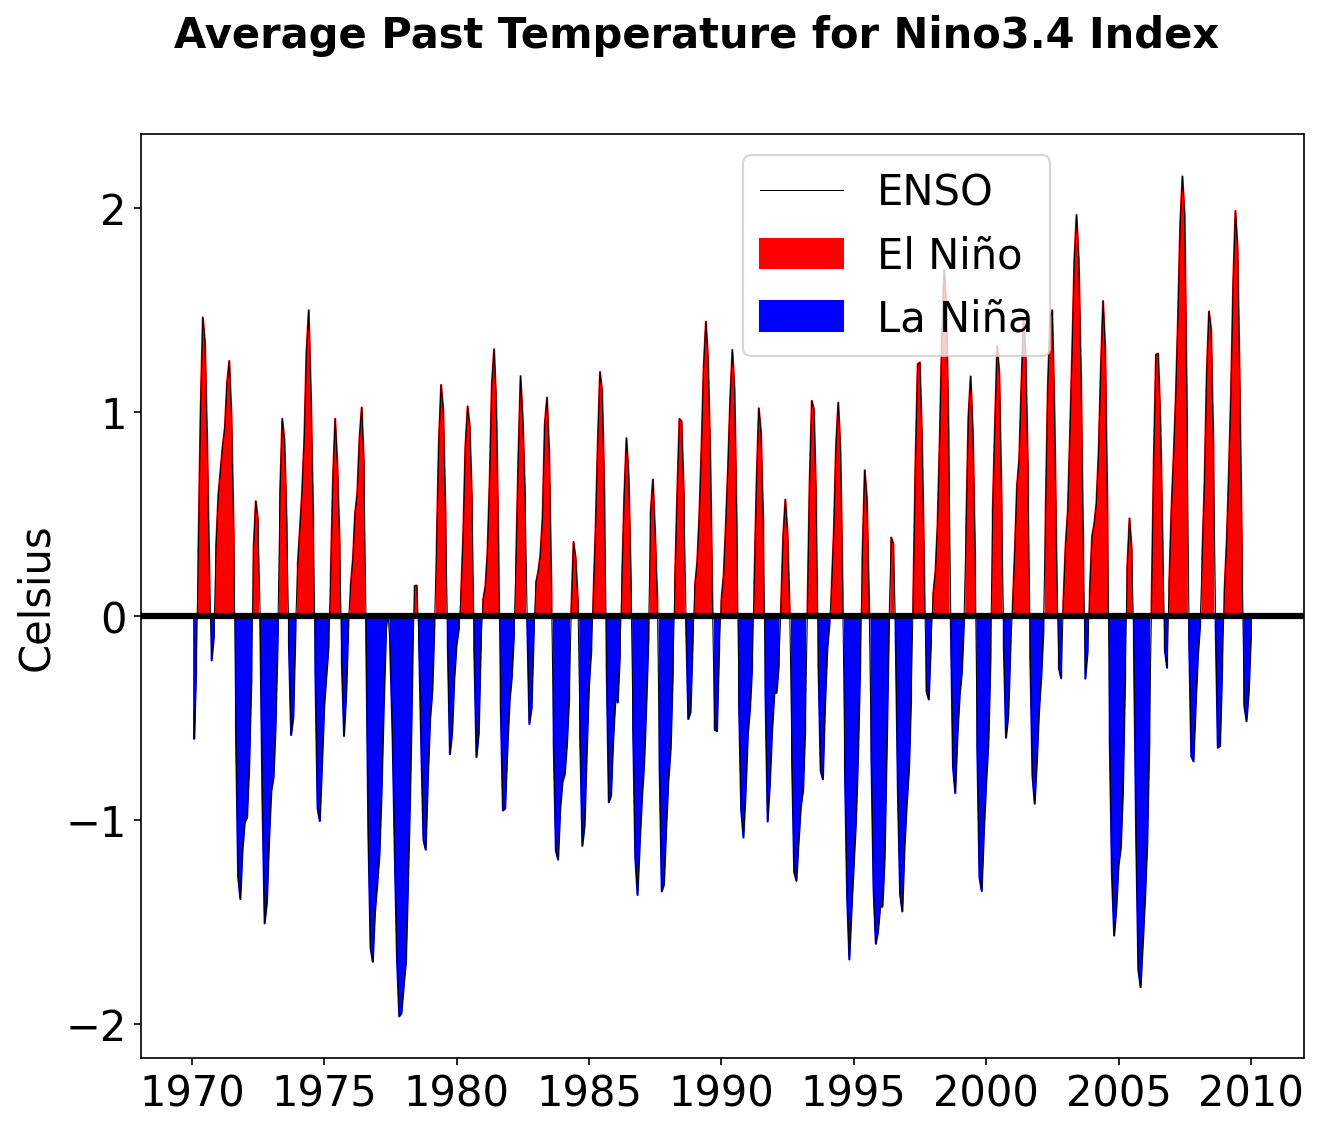

In [ ]:
#Plot for Nino3.4 for the Past
fig, axs = plt.subplot_mosaic([['a)']],figsize=(10. , 8.),facecolor='white')
plt.suptitle('Average Past Temperature for Nino3.4 Index ',fontweight="bold",fontsize=20)
ax1= plt.subplot(111)
plt.axhline(y=0, color='k', linewidth=3, linestyle='-')
#Find Anomaly
mean_anomaly = Temp_All_Ensembles_Nino34_past_ANOM.mean(["Ensemble", "lat", "lon"], skipna=True)
plt.plot(Temp_All_Ensembles_Nino34_past_ANOM.time, mean_anomaly, color='k', linewidth=0.5, label='ENSO')
#Positive Anolmaly
pos_anomaly = mean_anomaly > 0
plt.fill_between(Temp_All_Ensembles_Nino34_past_ANOM["time"], mean_anomaly, where=pos_anomaly, color='red', label='El Niño')
#Negative Anolmaly
neg_anomaly = mean_anomaly < 0
plt.fill_between(Temp_All_Ensembles_Nino34_past_ANOM["time"], mean_anomaly, where=neg_anomaly, color='blue', label='La Niña')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
plt.ylabel("Celsius")
plt.rcParams.update({'font.size': 20})

3) Have recent environmental efforts such as adaptation, geo-engineering, or mitigation strategies produced any significant changes regarding climate?


Thus, Pacific ENSO Applications Center (PEAC)’s strategy is to foster
collaborative effort to overcome these adversities, prepare for the necessary mitigation and adaptation
strategies, and to improve public awareness for oceanic regions (Schroeder et al. 2012). Island climate change preparedness ranges from coastal protection structures such as sea walls, elevated homes, improving agroforestry, reef restoration, planting native plants for beach erosion reduction, better fishing technologies and equipment, and diversifying (salt tolerant) crops (Mycoo et al. 2022).

Mitigation strategies


1.   "Together, businesses, governments, and communities can also: Lessen their dependence on fossil fuels, Embrace sustainable energy solutions such as wind and solar, Protect rainforests through sustainable practices, Move to electric vehicles, Develop a smart grid, Be more conscious of how they use energy, Work with local non-governmental organizations, Protect those who are directly impacted by inequitable climate practices, and Don't ignore the science of facts." (https://netimpact.org/blog/Inclusive-Climate-Action?utm_source=google&utm_medium=CPC&utm_campaign=climate-actions&gad_source=1&gclid=Cj0KCQjwiYOxBhC5ARIsAIvdH53y_Wy1m82bMDO6d5F5_R8dyDUQnIAL6FtL2n6OfTQYPrmkPH19XSkaAudXEALw_wcB)
2.   "Renewable energy is energy that comes from sources that are naturally replenished. *Look at eia picture* , Geothermal, hydropower, solar, and wind energy installations produce zero or almost no carbon emissions once they are up and running, Hydropower works by converting the kinetic energy of falling water into mechanical energy to operate a turbine, which then generates electricity, Wind power works by using the force of wind to rotate turbine blades, and the turbine converts rotational mechanical energy to electrical energy but can impact bird and bat populations, geothermal energy provides both direct heat and generates electricity by using Earth’s internal heat as an energy source then these heat pumps, often called ground-source heat pumps, effectively preheat air in winter or precool cool it in summer, reducing heating and air conditioning costs in homes and other buildings, passive solar building design coupled with good insulation and control of airflow can eliminate or practically eliminate the need for heating systems, We can save energy at the individual level by driving less: carpooling, combining errands into fewer trips, and walking, biking, or taking public transportation instead of cars, companies using the use of onsite combined heat and power (CHP) system, a facility produces its own electricity instead of buying it from the grid, and it uses the heat generated instead of wasting it, carbon capture and storage (CCS) removes the CO₂ from the final waste products which could be stored away or reused for other purposes, afforestation, reforestation, reducing deforestation, and planting forests that grow rapidly, regenerative farming returns carbon to the soil, another regenerative agriculture is holistic planned grazing, in which farmers plan their livestock grazing so that plants have time to recover after being grazed on, reduce greenhouse gas emissions from waste is landfill gas recovery, which focuses on capturing and using the methane generated from bacterial anaerobic decomposition of landfill waste, reduce food waste, recycling conserves natural resources, reduces waste going into landfills and incinerators, and prevents degradation of land that often accompanies obtaining new raw materials such as metals, to mitigate climate change involves dietary choices in food consumption" (https://earthathome.org/de/climate-change-mitigation/mitigation-strategies/)






adaptation strategies (especially Geo-engennering strategies)


1.   "Roads and bridges may need to be built or adapted to withstand higher temperatures and more powerful storms, some cities on coastlines may have to establish systems to prevent flooding in streets and underground transport, Mountainous regions may have to find ways to limit landslides and overflow from melting glaciers." (https://www.un.org/en/climatechange/climate-adaptation?gad_source=1&gclid=Cj0KCQjwiYOxBhC5ARIsAIvdH519JUHnhGX8rZCyy9zVxvc2z5vww33qGtPBVLnxN0UTSt99gA-M7sgaAtaCEALw_wcB)
2.   "Green infrastructure refers to structures that use plants, soil, and other natural features to perform functions such as providing shade, absorbing heat, blocking wind, or absorbing stormwater" (https://earthathome.org/de/climate-change-mitigation/mitigation-strategies/)








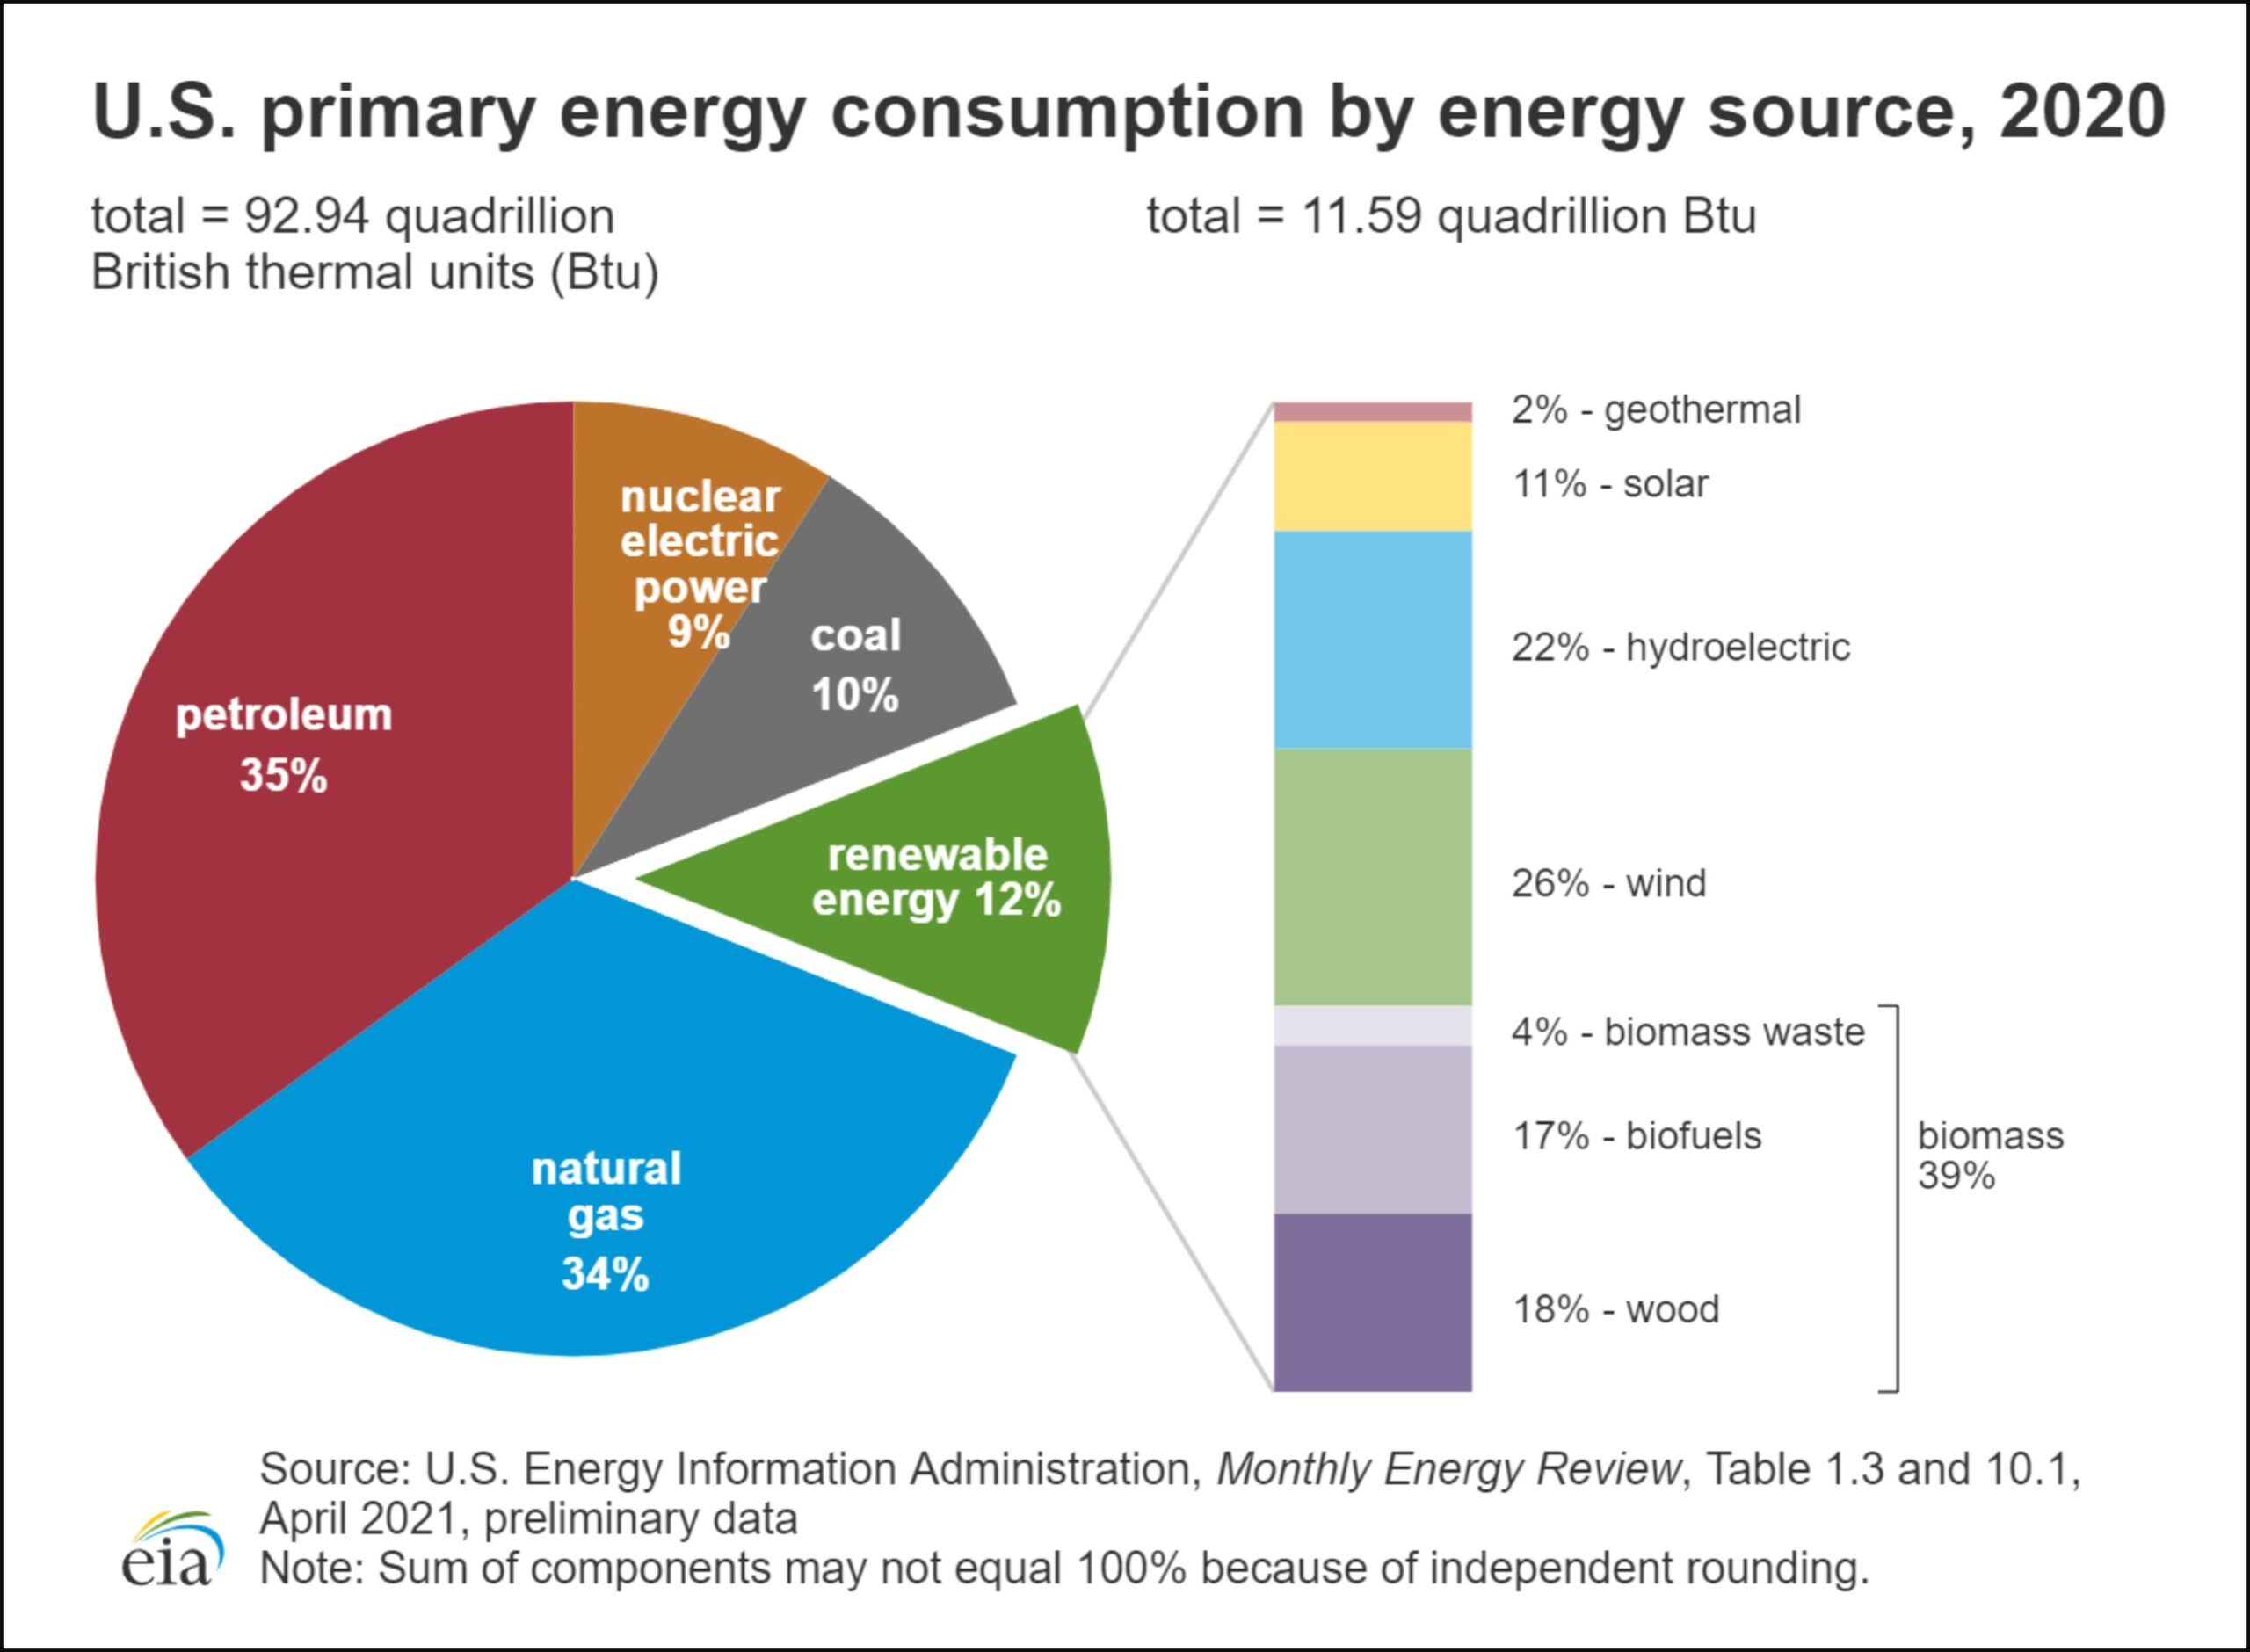



1. How have El Niño and La Niña years impacted the Oceanic regions?


In [ ]:
#Crop Data before outlineing Oceanic Regions

#Smaller Regions
Temp_All_Ensembles_Oceanic_R=Temp_All_Ensembles.loc[dict(lat=slice(-30,25))].loc[dict(lon=slice(120,253))]
Prec_All_Ensembles_Oceanic_R=Prec_All_Ensembles.loc[dict(lat=slice(-30,25))].loc[dict(lon=slice(120,253))]
Wind_All_Ensembles_Oceanic_R=Wind_All_Ensembles.loc[dict(lat=slice(-30,25))].loc[dict(lon=slice(120,253))]


#Oceanic Regions
Temp_All_Ensembles_Oceanic_R_Poly=Temp_All_Ensembles_Oceanic_R.copy()#.load()
Prec_All_Ensembles_Oceanic_R_Poly=Prec_All_Ensembles_Oceanic_R.copy()#.load()
Wind_All_Ensembles_Oceanic_R_Poly=Wind_All_Ensembles_Oceanic_R.copy()#.load()

Temp_All_Ensembles_Oceanic_R_Micro=Temp_All_Ensembles_Oceanic_R.copy()#.load()
Prec_All_Ensembles_Oceanic_R_Micro=Prec_All_Ensembles_Oceanic_R.copy()#.load()
Wind_All_Ensembles_Oceanic_R_Micro=Wind_All_Ensembles_Oceanic_R.copy()#.load()

Temp_All_Ensembles_Oceanic_R_Melan=Temp_All_Ensembles_Oceanic_R.copy()#.load()
Prec_All_Ensembles_Oceanic_R_Melan=Prec_All_Ensembles_Oceanic_R.copy()#.load()
Wind_All_Ensembles_Oceanic_R_Melan=Wind_All_Ensembles_Oceanic_R.copy()#.load()

#Polynesia
Polynesia_Name= 'Polynesia'
Poly_P1 = (214,1)
Poly_P2 = (252,-27)
Poly_P3 = (170,-27)
Poly_P4 = (182,-17)
Poly_P5 = (175,-8)
Poly_P6 = (182,1)
Poly_P7 = (198,20)


#Points of the Polynesia Region
Poly_Poly=Polygon([Poly_P1,Poly_P2,Poly_P3,Poly_P4,Poly_P5,Poly_P6, Poly_P7])
#Masking Domain for the Polynesia Region
mask_Poly= np.empty((Prec_All_Ensembles_Oceanic_R_Poly.lat.size,Prec_All_Ensembles_Oceanic_R_Poly.lon.size),dtype=bool)
for i in range(len(Prec_All_Ensembles_Oceanic_R_Poly.lat)):
    for j in range(len(Prec_All_Ensembles_Oceanic_R_Poly.lon)):
        #Create Mask
        mask_Poly[i,j]=Poly_Poly.contains(Point(Prec_All_Ensembles_Oceanic_R_Poly.lon[j],Prec_All_Ensembles_Oceanic_R_Poly.lat[i]))

#Mask for Polynesia for each Region
Temp_All_Ensembles_Oceanic_R_Poly=Temp_All_Ensembles_Oceanic_R_Poly.where(mask_Poly)
Prec_All_Ensembles_Oceanic_R_Poly=Prec_All_Ensembles_Oceanic_R_Poly.where(mask_Poly)
Wind_All_Ensembles_Oceanic_R_Poly=Wind_All_Ensembles_Oceanic_R_Poly.where(mask_Poly)



#Micronesia
Micronesia_Name= 'Micronesia'
Micro_P1 = (137,23)
Micro_P2 = (175,23)
Micro_P3 = (193,14)
Micro_P4 = (175,-8)
Micro_P5 = (168,1)
Micro_P6 = (131,1)


Micro_Poly=Polygon([Micro_P1,Micro_P2,Micro_P3,Micro_P4,Micro_P5,Micro_P6])
mask_Micro= np.empty((Prec_All_Ensembles_Oceanic_R_Micro.lat.size,Prec_All_Ensembles_Oceanic_R_Micro.lon.size),dtype=bool)
for i in range(len(Prec_All_Ensembles_Oceanic_R_Micro.lat)):
    for j in range(len(Prec_All_Ensembles_Oceanic_R_Micro.lon)):
        mask_Micro[i,j]=Micro_Poly.contains(Point(Prec_All_Ensembles_Oceanic_R_Micro.lon[j],Prec_All_Ensembles_Oceanic_R_Micro.lat[i]))


Temp_All_Ensembles_Oceanic_R_Micro=Temp_All_Ensembles_Oceanic_R_Micro.where(mask_Micro)
Prec_All_Ensembles_Oceanic_R_Micro=Prec_All_Ensembles_Oceanic_R_Micro.where(mask_Micro)
Wind_All_Ensembles_Oceanic_R_Micro=Wind_All_Ensembles_Oceanic_R_Micro.where(mask_Micro)



#Melanesia
Melanesia_Name= 'Melanesia'
Melan_P1 = (131,1)
Melan_P2 = (168,1)
Melan_P3 = (182,-17)
Melan_P4 = (170,-30)
Melan_P5 = (165,-30)
Melan_P6 = (142,-10)
Melan_P7 = (134,-10)
Melan_P8 = (134,-5)
Melan_P9 = (131,-5)

Melan_Poly=Polygon([Melan_P1,Melan_P2,Melan_P3,Melan_P4,Melan_P5,Melan_P6,Melan_P7,Melan_P8,Melan_P9])
mask_Melan= np.empty((Prec_All_Ensembles_Oceanic_R_Melan.lat.size,Prec_All_Ensembles_Oceanic_R_Melan.lon.size),dtype=bool)
for i in range(len(Prec_All_Ensembles_Oceanic_R_Melan.lat)):
    for j in range(len(Prec_All_Ensembles_Oceanic_R_Melan.lon)):
        mask_Melan[i,j]=Melan_Poly.contains(Point(Prec_All_Ensembles_Oceanic_R_Melan.lon[j],Prec_All_Ensembles_Oceanic_R_Melan.lat[i]))



Temp_All_Ensembles_Oceanic_R_Melan=Temp_All_Ensembles_Oceanic_R_Melan.where(mask_Melan)
Prec_All_Ensembles_Oceanic_R_Melan=Prec_All_Ensembles_Oceanic_R_Melan.where(mask_Melan)
Wind_All_Ensembles_Oceanic_R_Melan=Wind_All_Ensembles_Oceanic_R_Melan.where(mask_Melan)


In [ ]:
#View the data

print(Melan_Poly)

print("="*30)

print(mask_Melan)

print("="*30)

print(Temp_All_Ensembles_Oceanic_R_Melan)

POLYGON ((131 1, 168 1, 182 -17, 170 -30, 165 -30, 142 -10, 134 -10, 134 -5, 131 -5, 131 1))
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
<xarray.DataArray 'TS' (Ensemble: 10, time: 1020, lat: 59, lon: 107)>
dask.array<where, shape=(10, 1020, 59, 107), dtype=float32, chunksize=(1, 2, 59, 107), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2065-01-01
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 248.8 250.0 251.2 252.5
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 23.09 24.03 24.97
Dimensions without coordinates: Ensemble


In [ ]:
#Slice based on the past
Temp_All_Ensembles_Oceanic_R_Poly_past = Temp_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('1970-01','2010-01'))]
Prec_All_Ensembles_Oceanic_R_Poly_past = Prec_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('1970-01','2010-01'))]
Wind_All_Ensembles_Oceanic_R_Poly_past = Wind_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('1970-01','2010-01'))]

Temp_All_Ensembles_Oceanic_R_Micro_past = Temp_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('1970-01','2010-01'))]
Prec_All_Ensembles_Oceanic_R_Micro_past = Prec_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('1970-01','2010-01'))]
Wind_All_Ensembles_Oceanic_R_Micro_past = Wind_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('1970-01','2010-01'))]

Temp_All_Ensembles_Oceanic_R_Melan_past = Temp_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('1970-01','2010-01'))]
Prec_All_Ensembles_Oceanic_R_Melan_past = Prec_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('1970-01','2010-01'))]
Wind_All_Ensembles_Oceanic_R_Melan_past = Wind_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('1970-01','2010-01'))]



In [ ]:
Temp_All_Ensembles_Oceanic_R_Poly_past

<xarray.DataArray 'TS' (Ensemble: 10, time: 480, lat: 59, lon: 107)>
dask.array<getitem, shape=(10, 480, 59, 107), dtype=float32, chunksize=(1, 2, 59, 107), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2010-01-01
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 248.8 250.0 251.2 252.5
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 23.09 24.03 24.97
Dimensions without coordinates: Ensemble

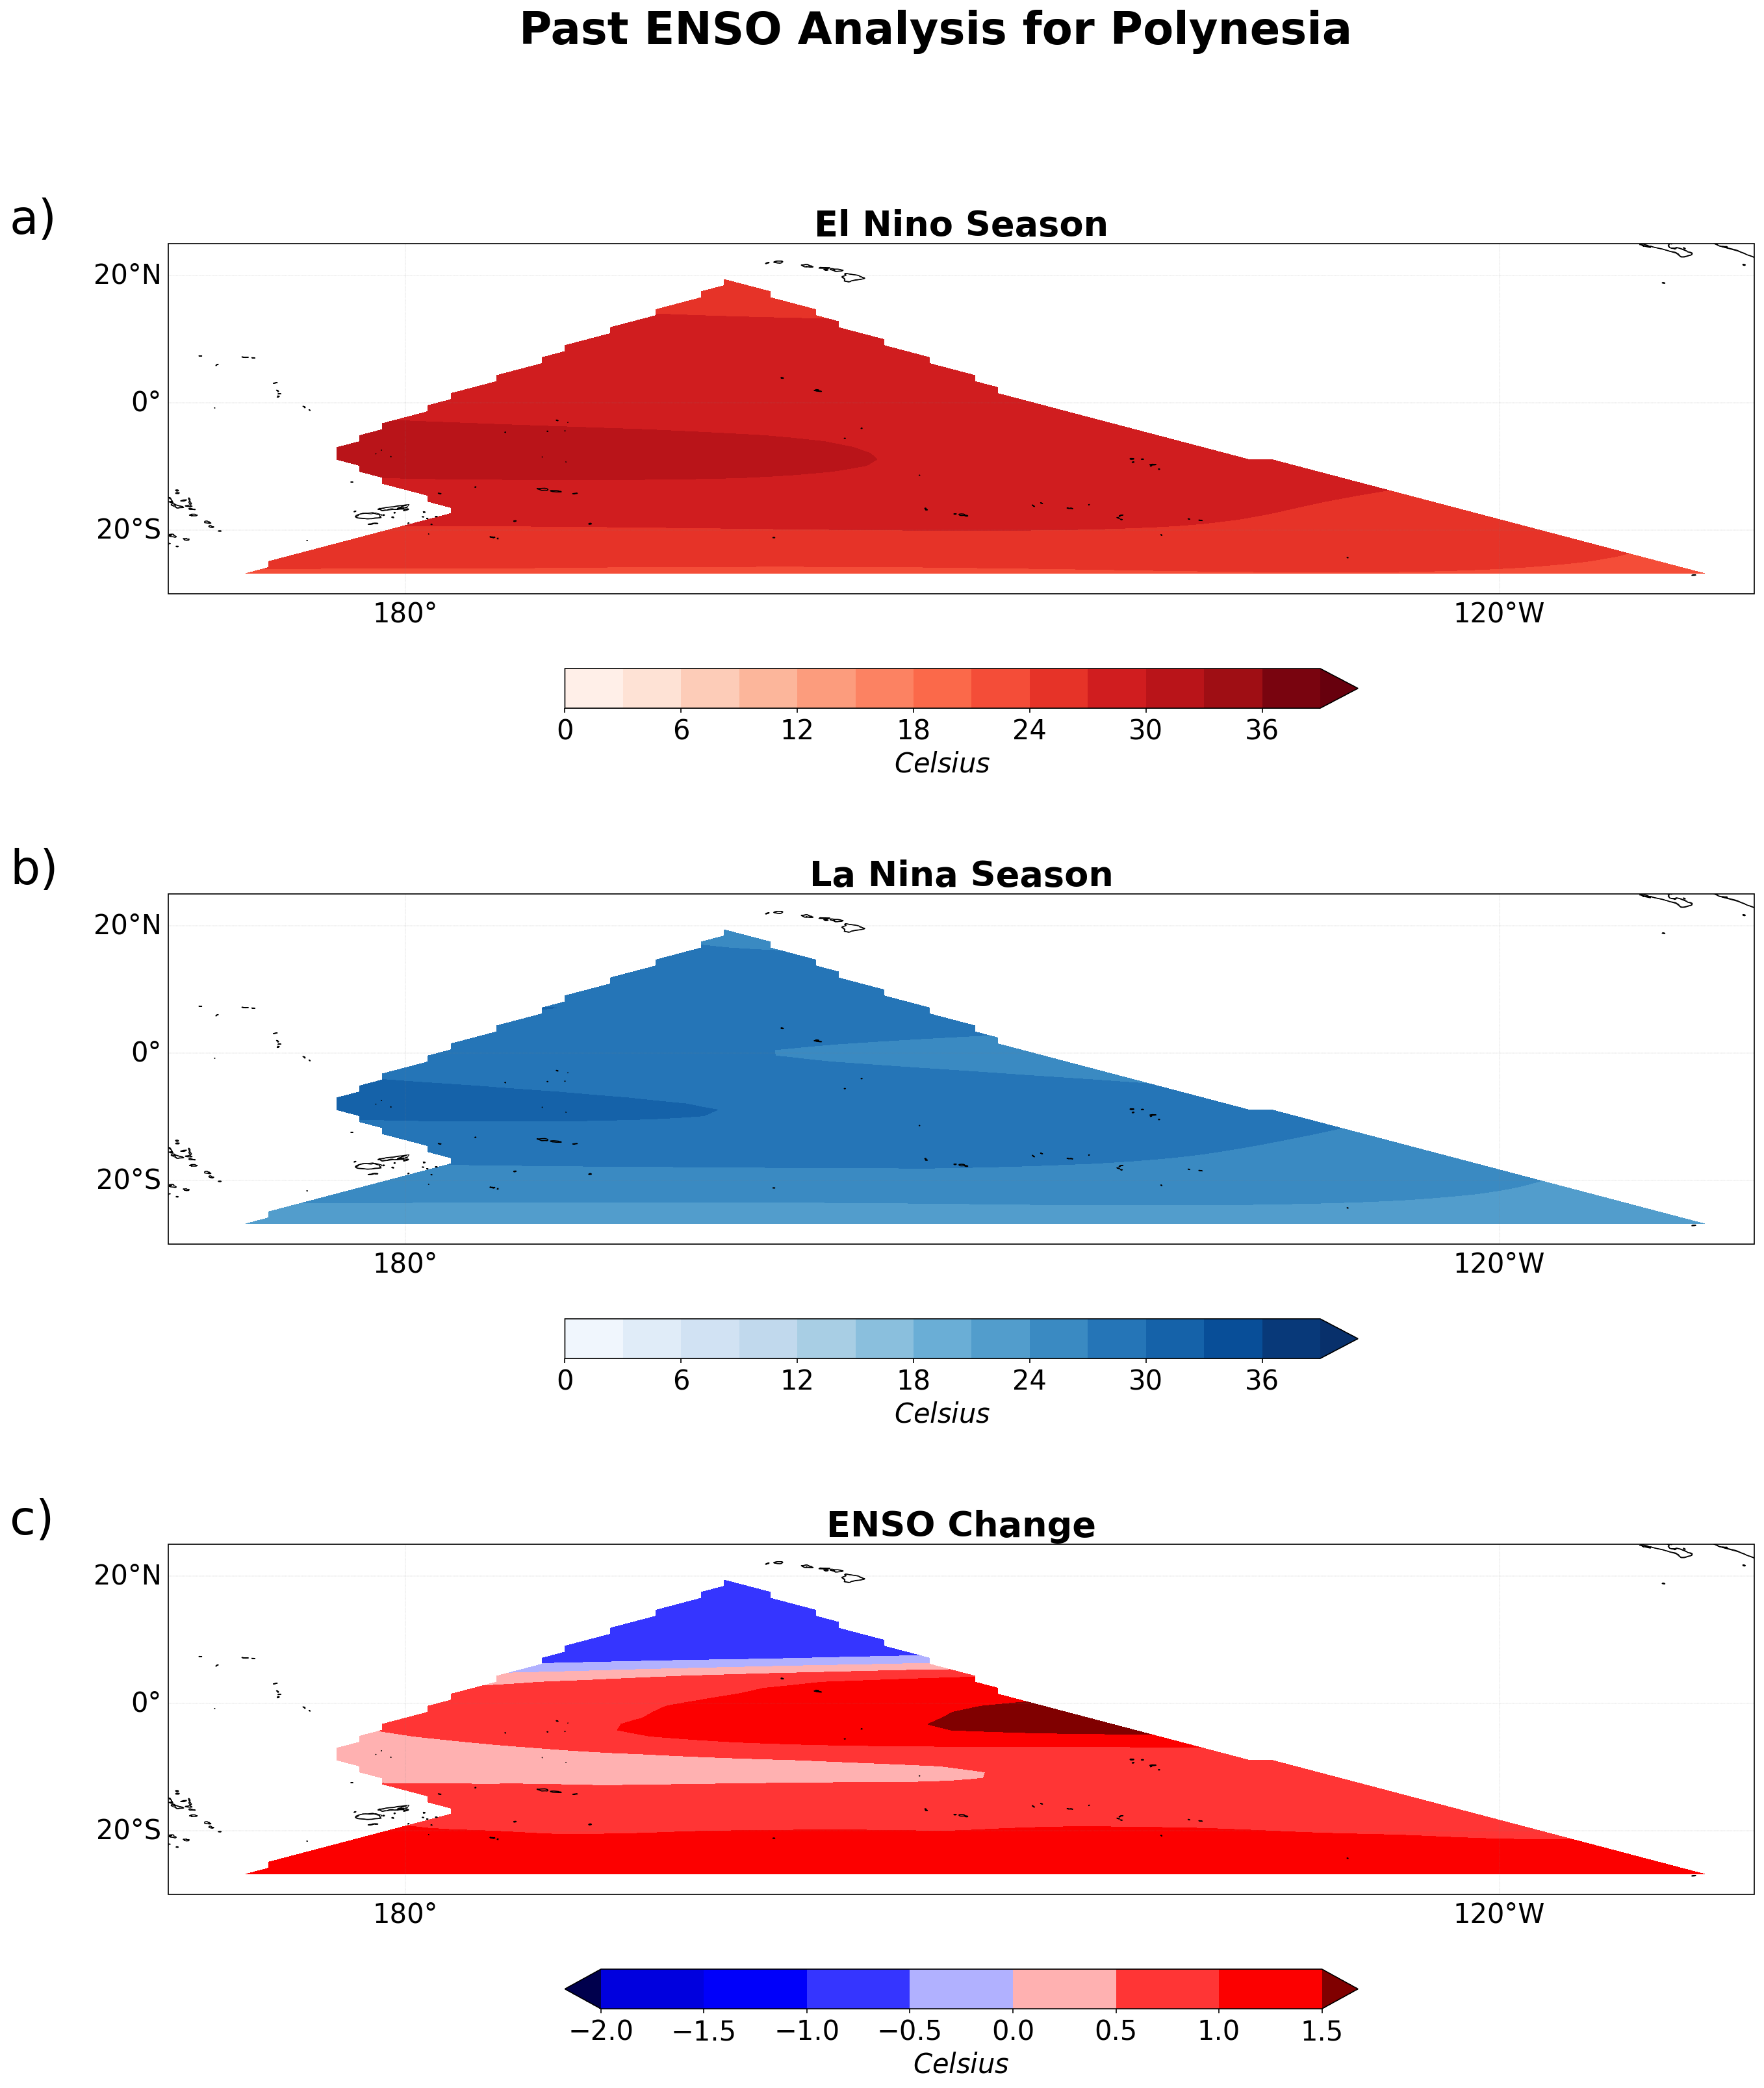

In [ ]:
#Plot past ENSO Analysis and ENSO Change for Polynesia

plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Past ENSO Analysis for '+str(Polynesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-13, 74, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Poly_past.lon,Temp_All_Ensembles_Oceanic_R_Poly_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Poly_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-13, 74, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Poly_past.lon,Temp_All_Ensembles_Oceanic_R_Poly_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Poly_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-13, 74, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Poly_past.lon,Temp_All_Ensembles_Oceanic_R_Poly_past.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Poly_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Poly_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()

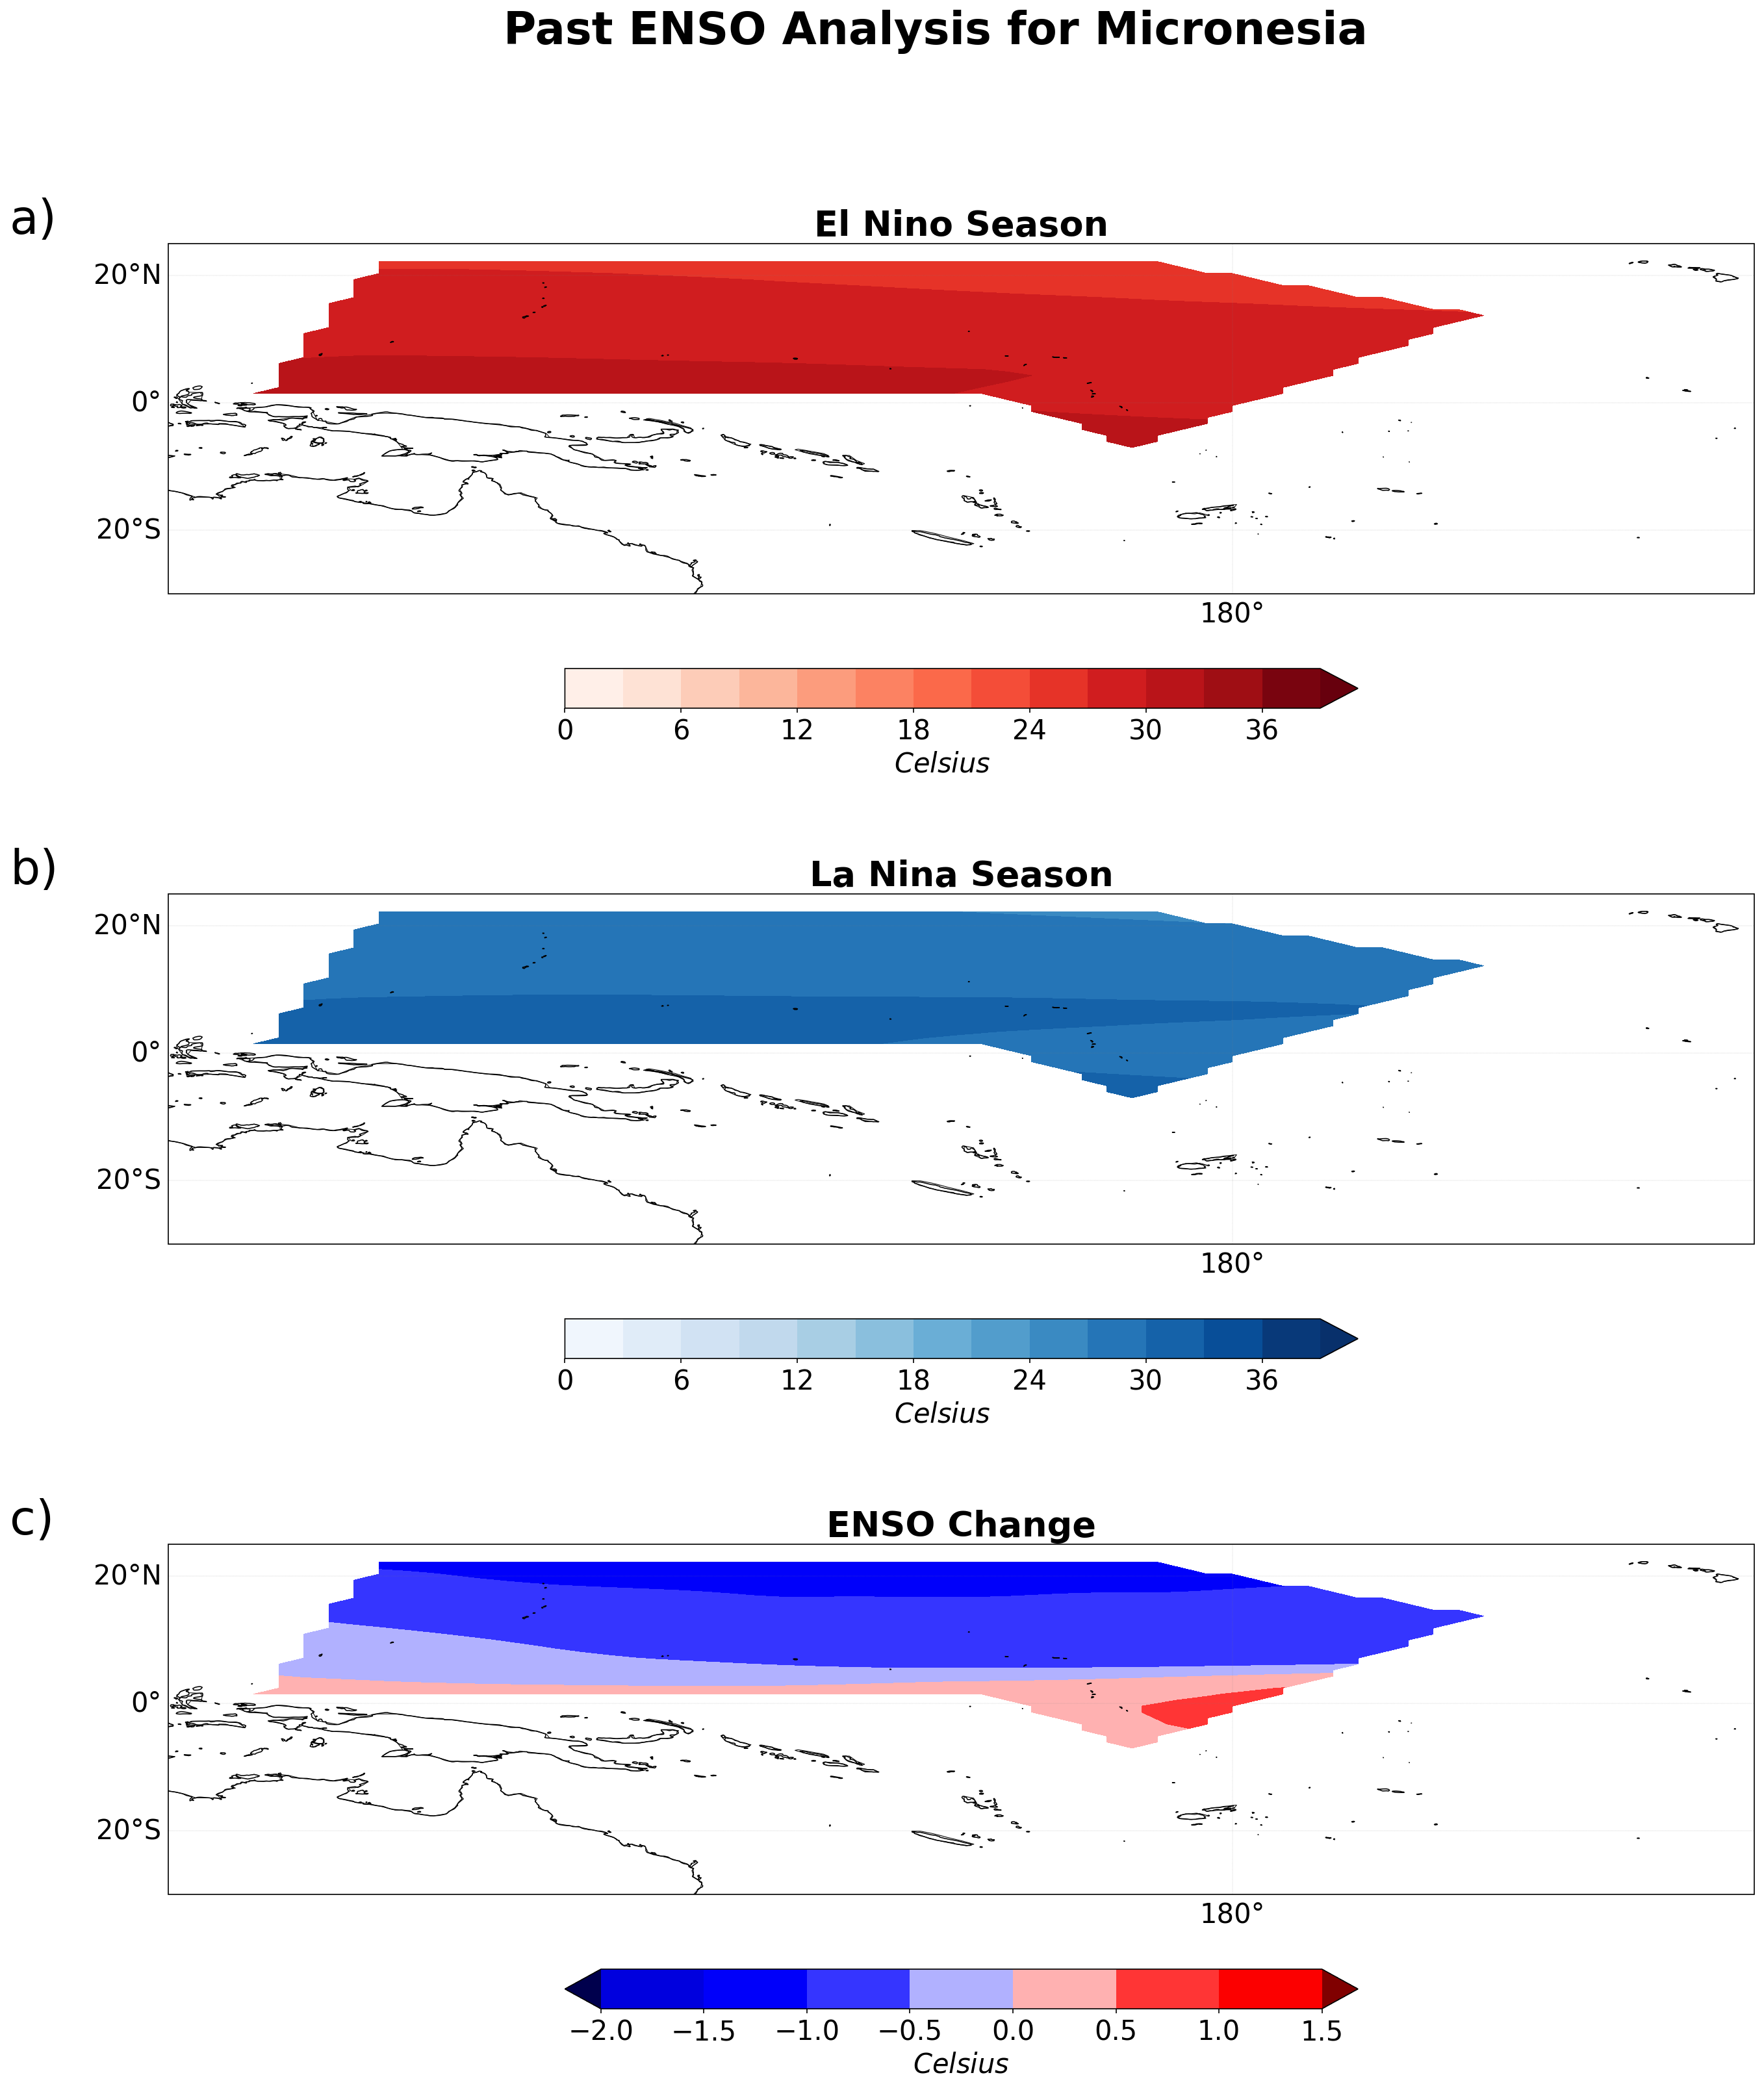

In [ ]:
#Plot past ENSO Analysis and ENSO Change for Micronesia
plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Past ENSO Analysis for '+str(Micronesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-53, 26, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Micro_past.lon,Temp_All_Ensembles_Oceanic_R_Micro_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Micro_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-53, 26, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Micro_past.lon,Temp_All_Ensembles_Oceanic_R_Micro_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Micro_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-53, 26, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Micro_past.lon,Temp_All_Ensembles_Oceanic_R_Micro_past.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Micro_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Micro_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()

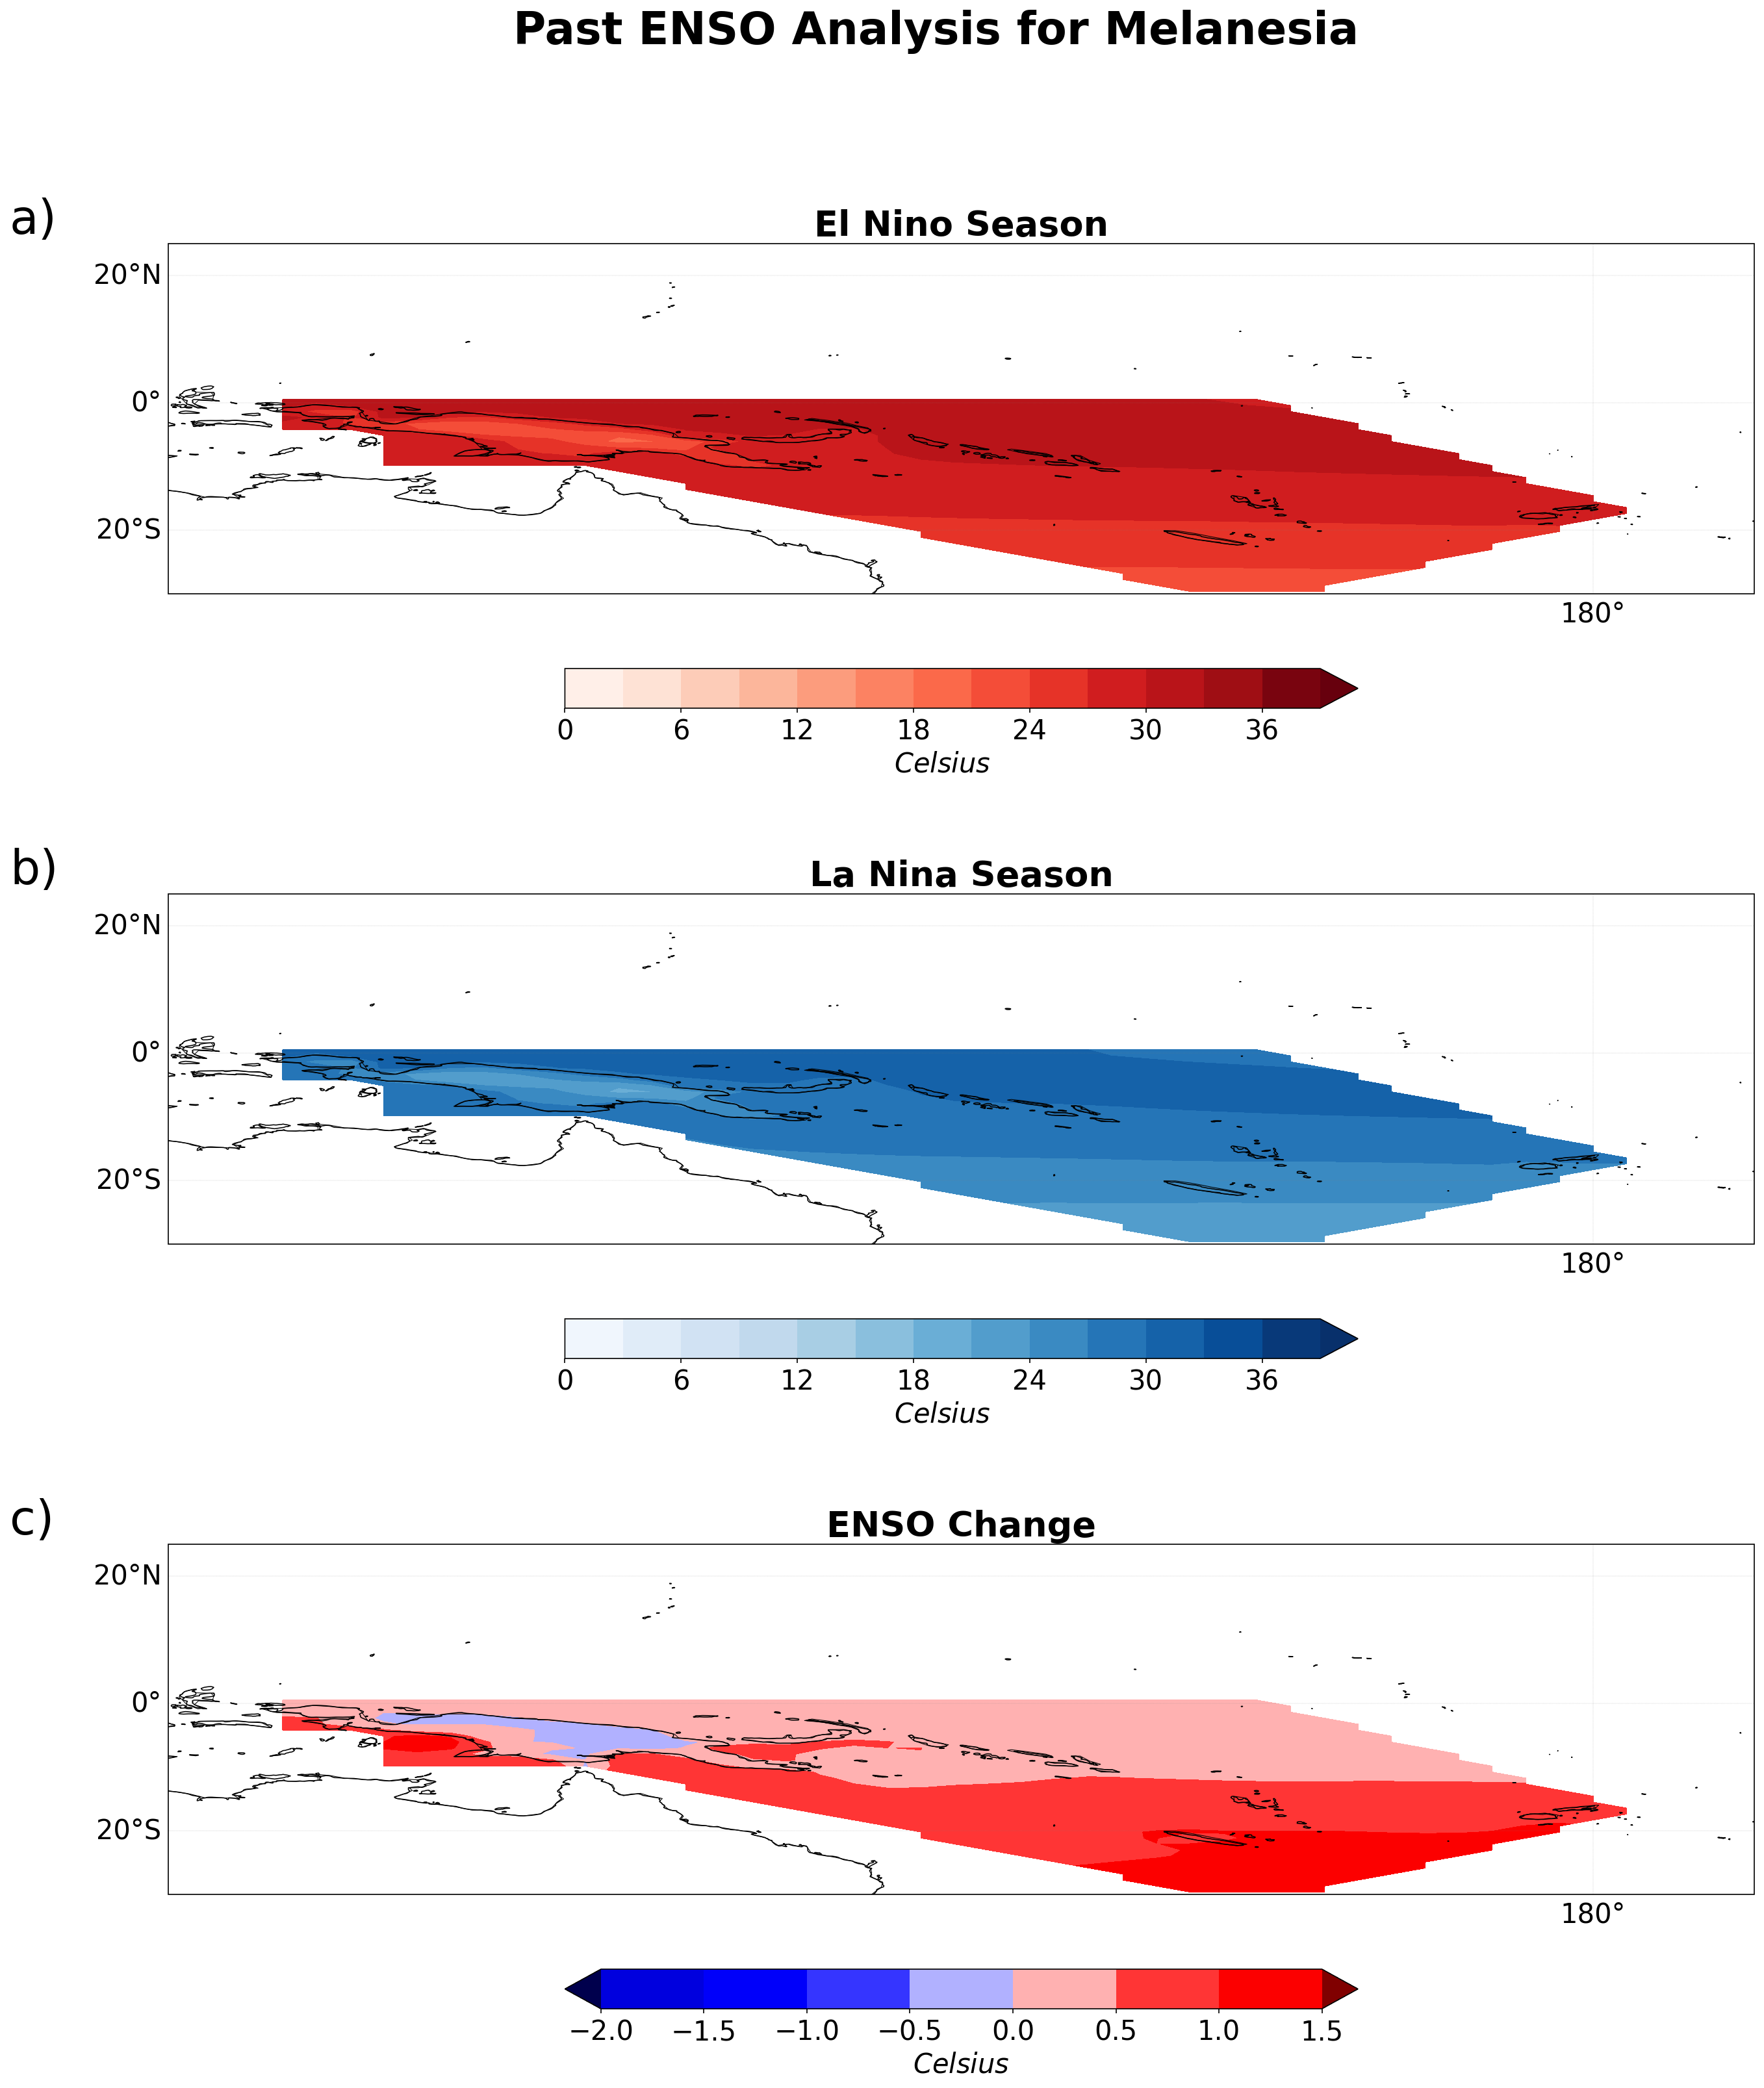

In [ ]:
#Plot past ENSO Analysis and ENSO Change for Melanesia

plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Past ENSO Analysis for '+str(Melanesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-53, 6, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Melan_past.lon,Temp_All_Ensembles_Oceanic_R_Melan_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Melan_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-53, 6, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Melan_past.lon,Temp_All_Ensembles_Oceanic_R_Melan_past.lat,
                  (Temp_All_Ensembles_Oceanic_R_Melan_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-53, 6, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Melan_past.lon,Temp_All_Ensembles_Oceanic_R_Melan_past.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Melan_past[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Melan_past[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()

5. Depending on the degree that climate change were to be altered in the future, would ENSO severely affect the oceanic regions? If so, to what extent?

In [ ]:
#Slice ENSO for the Future
Temp_All_Ensembles_Oceanic_R_Poly_future = Temp_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('2025-01','2065-01'))]
Prec_All_Ensembles_Oceanic_R_Poly_future = Prec_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('2025-01','2065-01'))]
Wind_All_Ensembles_Oceanic_R_Poly_future = Wind_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('2025-01','2065-01'))]

Temp_All_Ensembles_Oceanic_R_Micro_future = Temp_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('2025-01','2065-01'))]
Prec_All_Ensembles_Oceanic_R_Micro_future = Prec_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('2025-01','2065-01'))]
Wind_All_Ensembles_Oceanic_R_Micro_future = Wind_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('2025-01','2065-01'))]

Temp_All_Ensembles_Oceanic_R_Melan_future = Temp_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('2025-01','2065-01'))]
Prec_All_Ensembles_Oceanic_R_Melan_future = Prec_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('2025-01','2065-01'))]
Wind_All_Ensembles_Oceanic_R_Melan_future = Wind_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('2025-01','2065-01'))]



In [ ]:
#View to see the data

Temp_All_Ensembles_Oceanic_R_Poly_future

<xarray.DataArray 'TS' (Ensemble: 10, time: 480, lat: 59, lon: 107)>
dask.array<getitem, shape=(10, 480, 59, 107), dtype=float32, chunksize=(1, 2, 59, 107), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2025-02-01 2025-03-01 ... 2065-01-01
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 248.8 250.0 251.2 252.5
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 23.09 24.03 24.97
Dimensions without coordinates: Ensemble

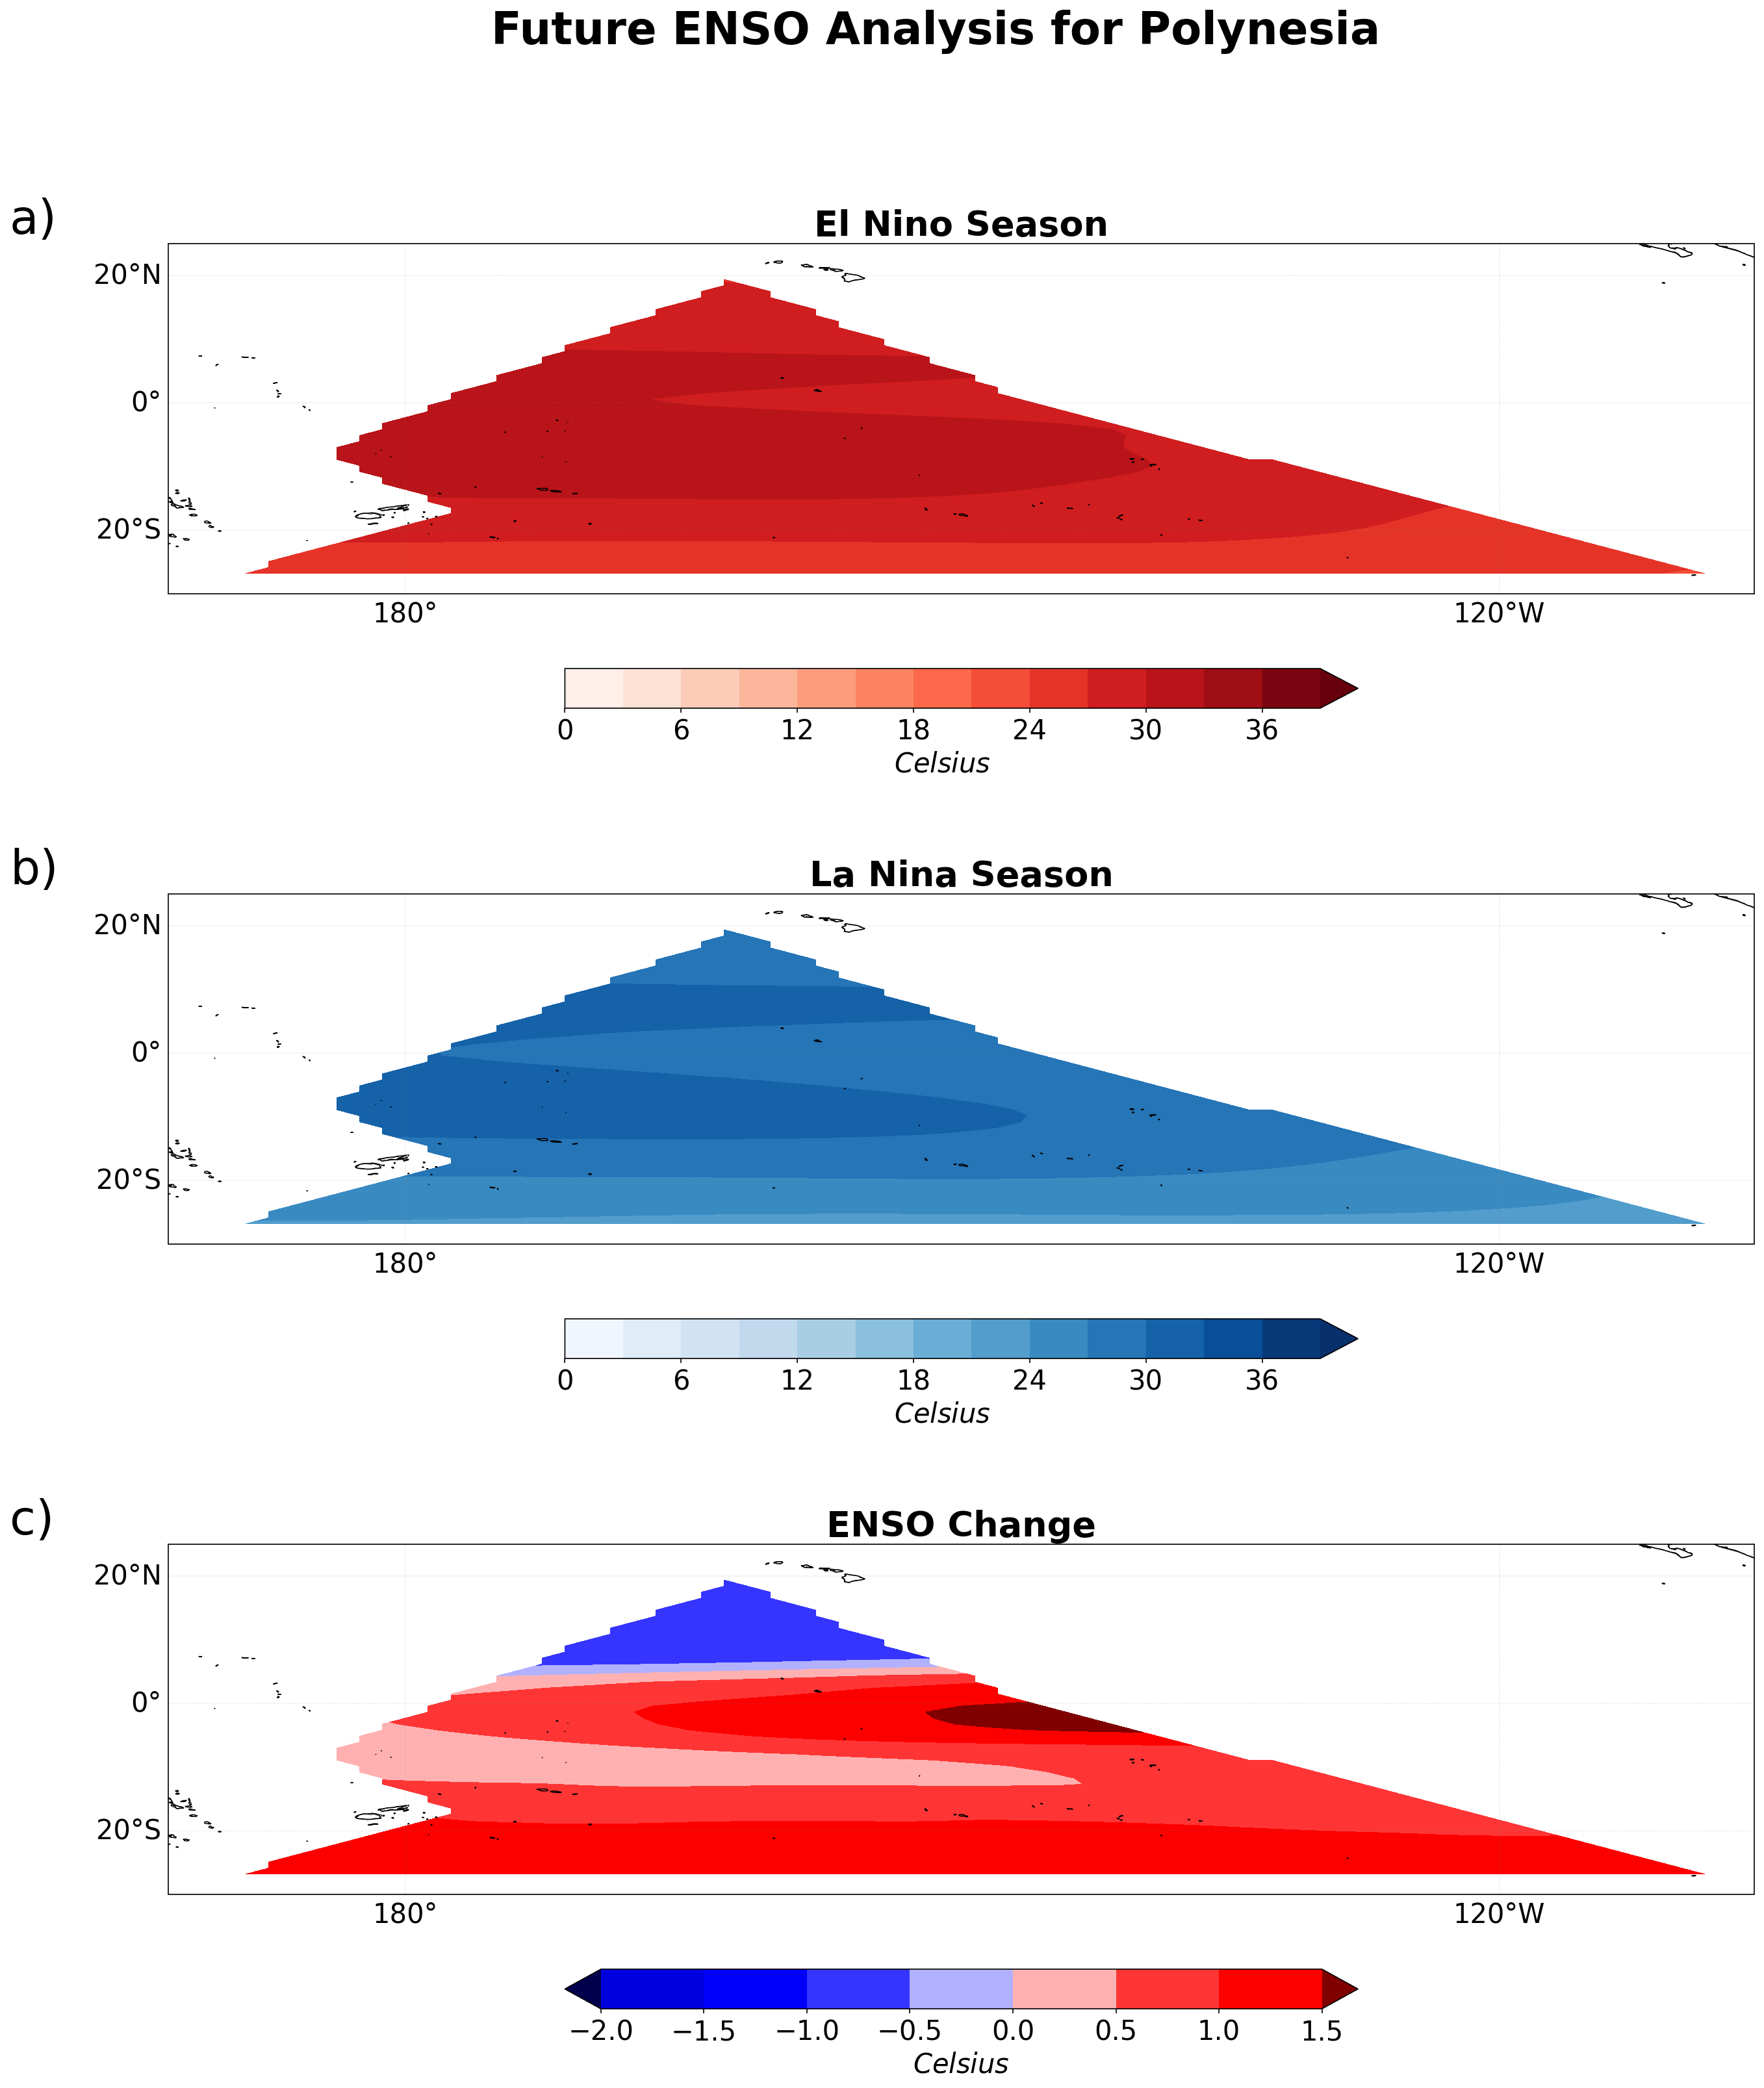

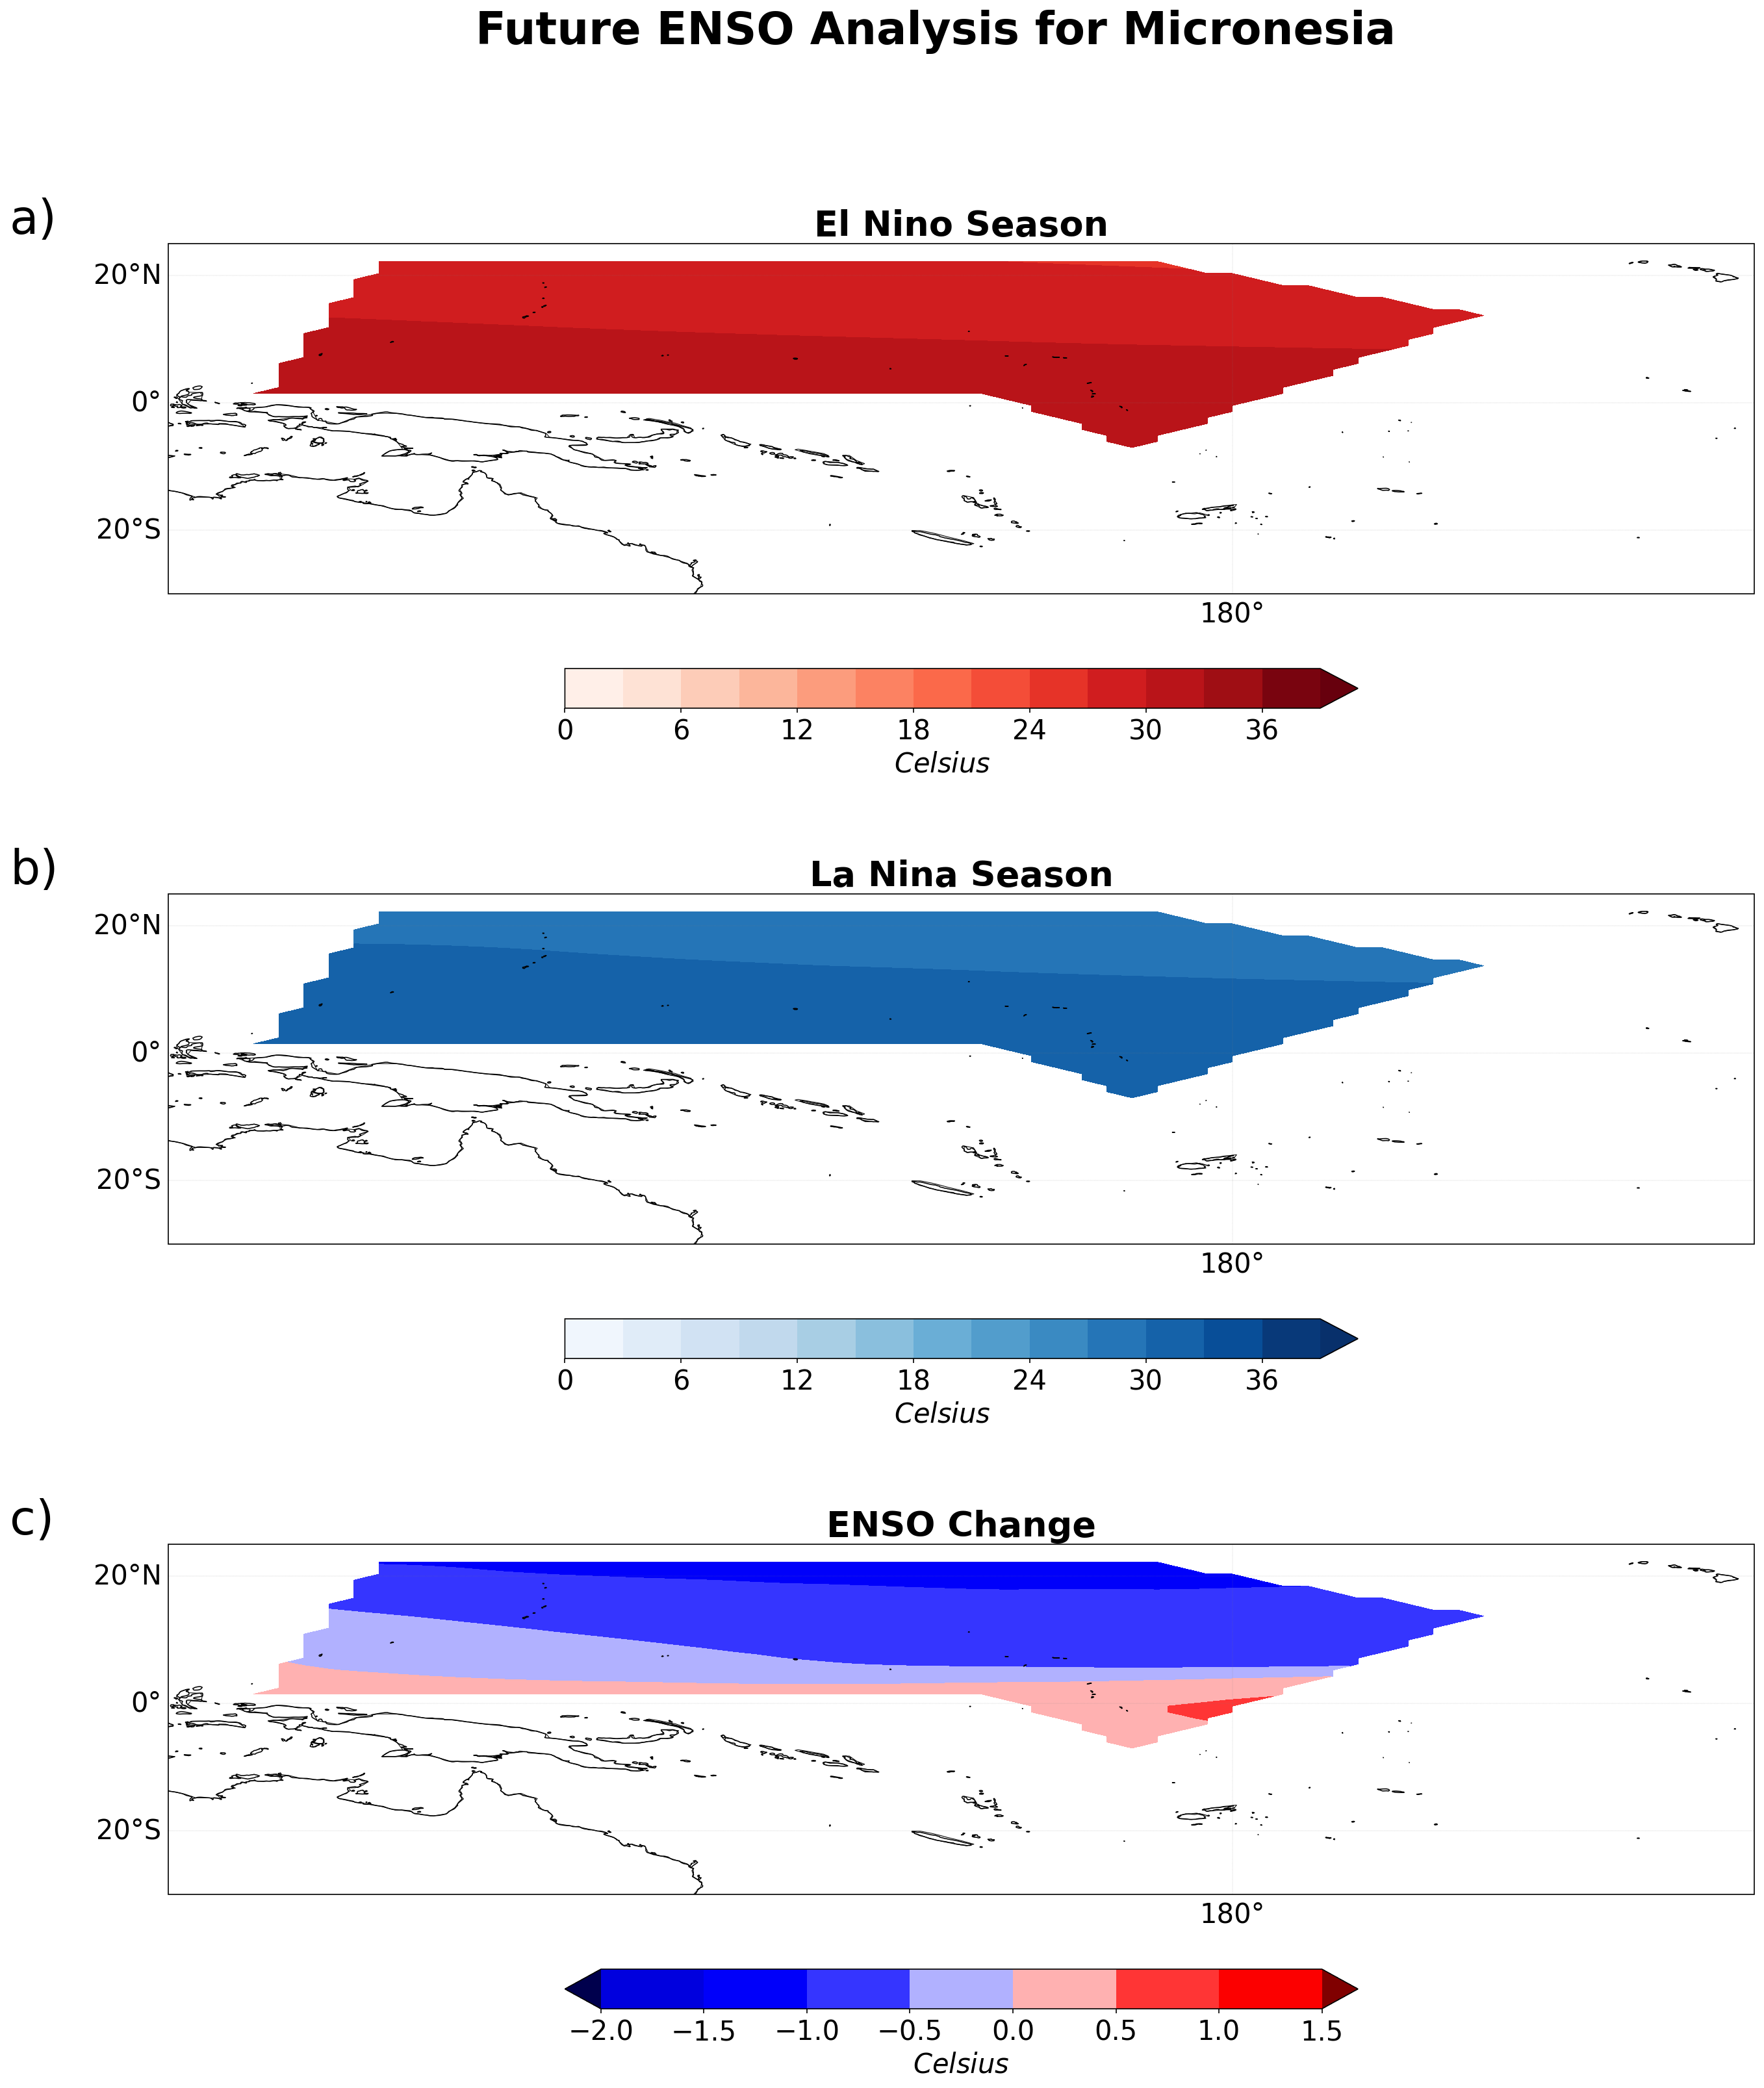

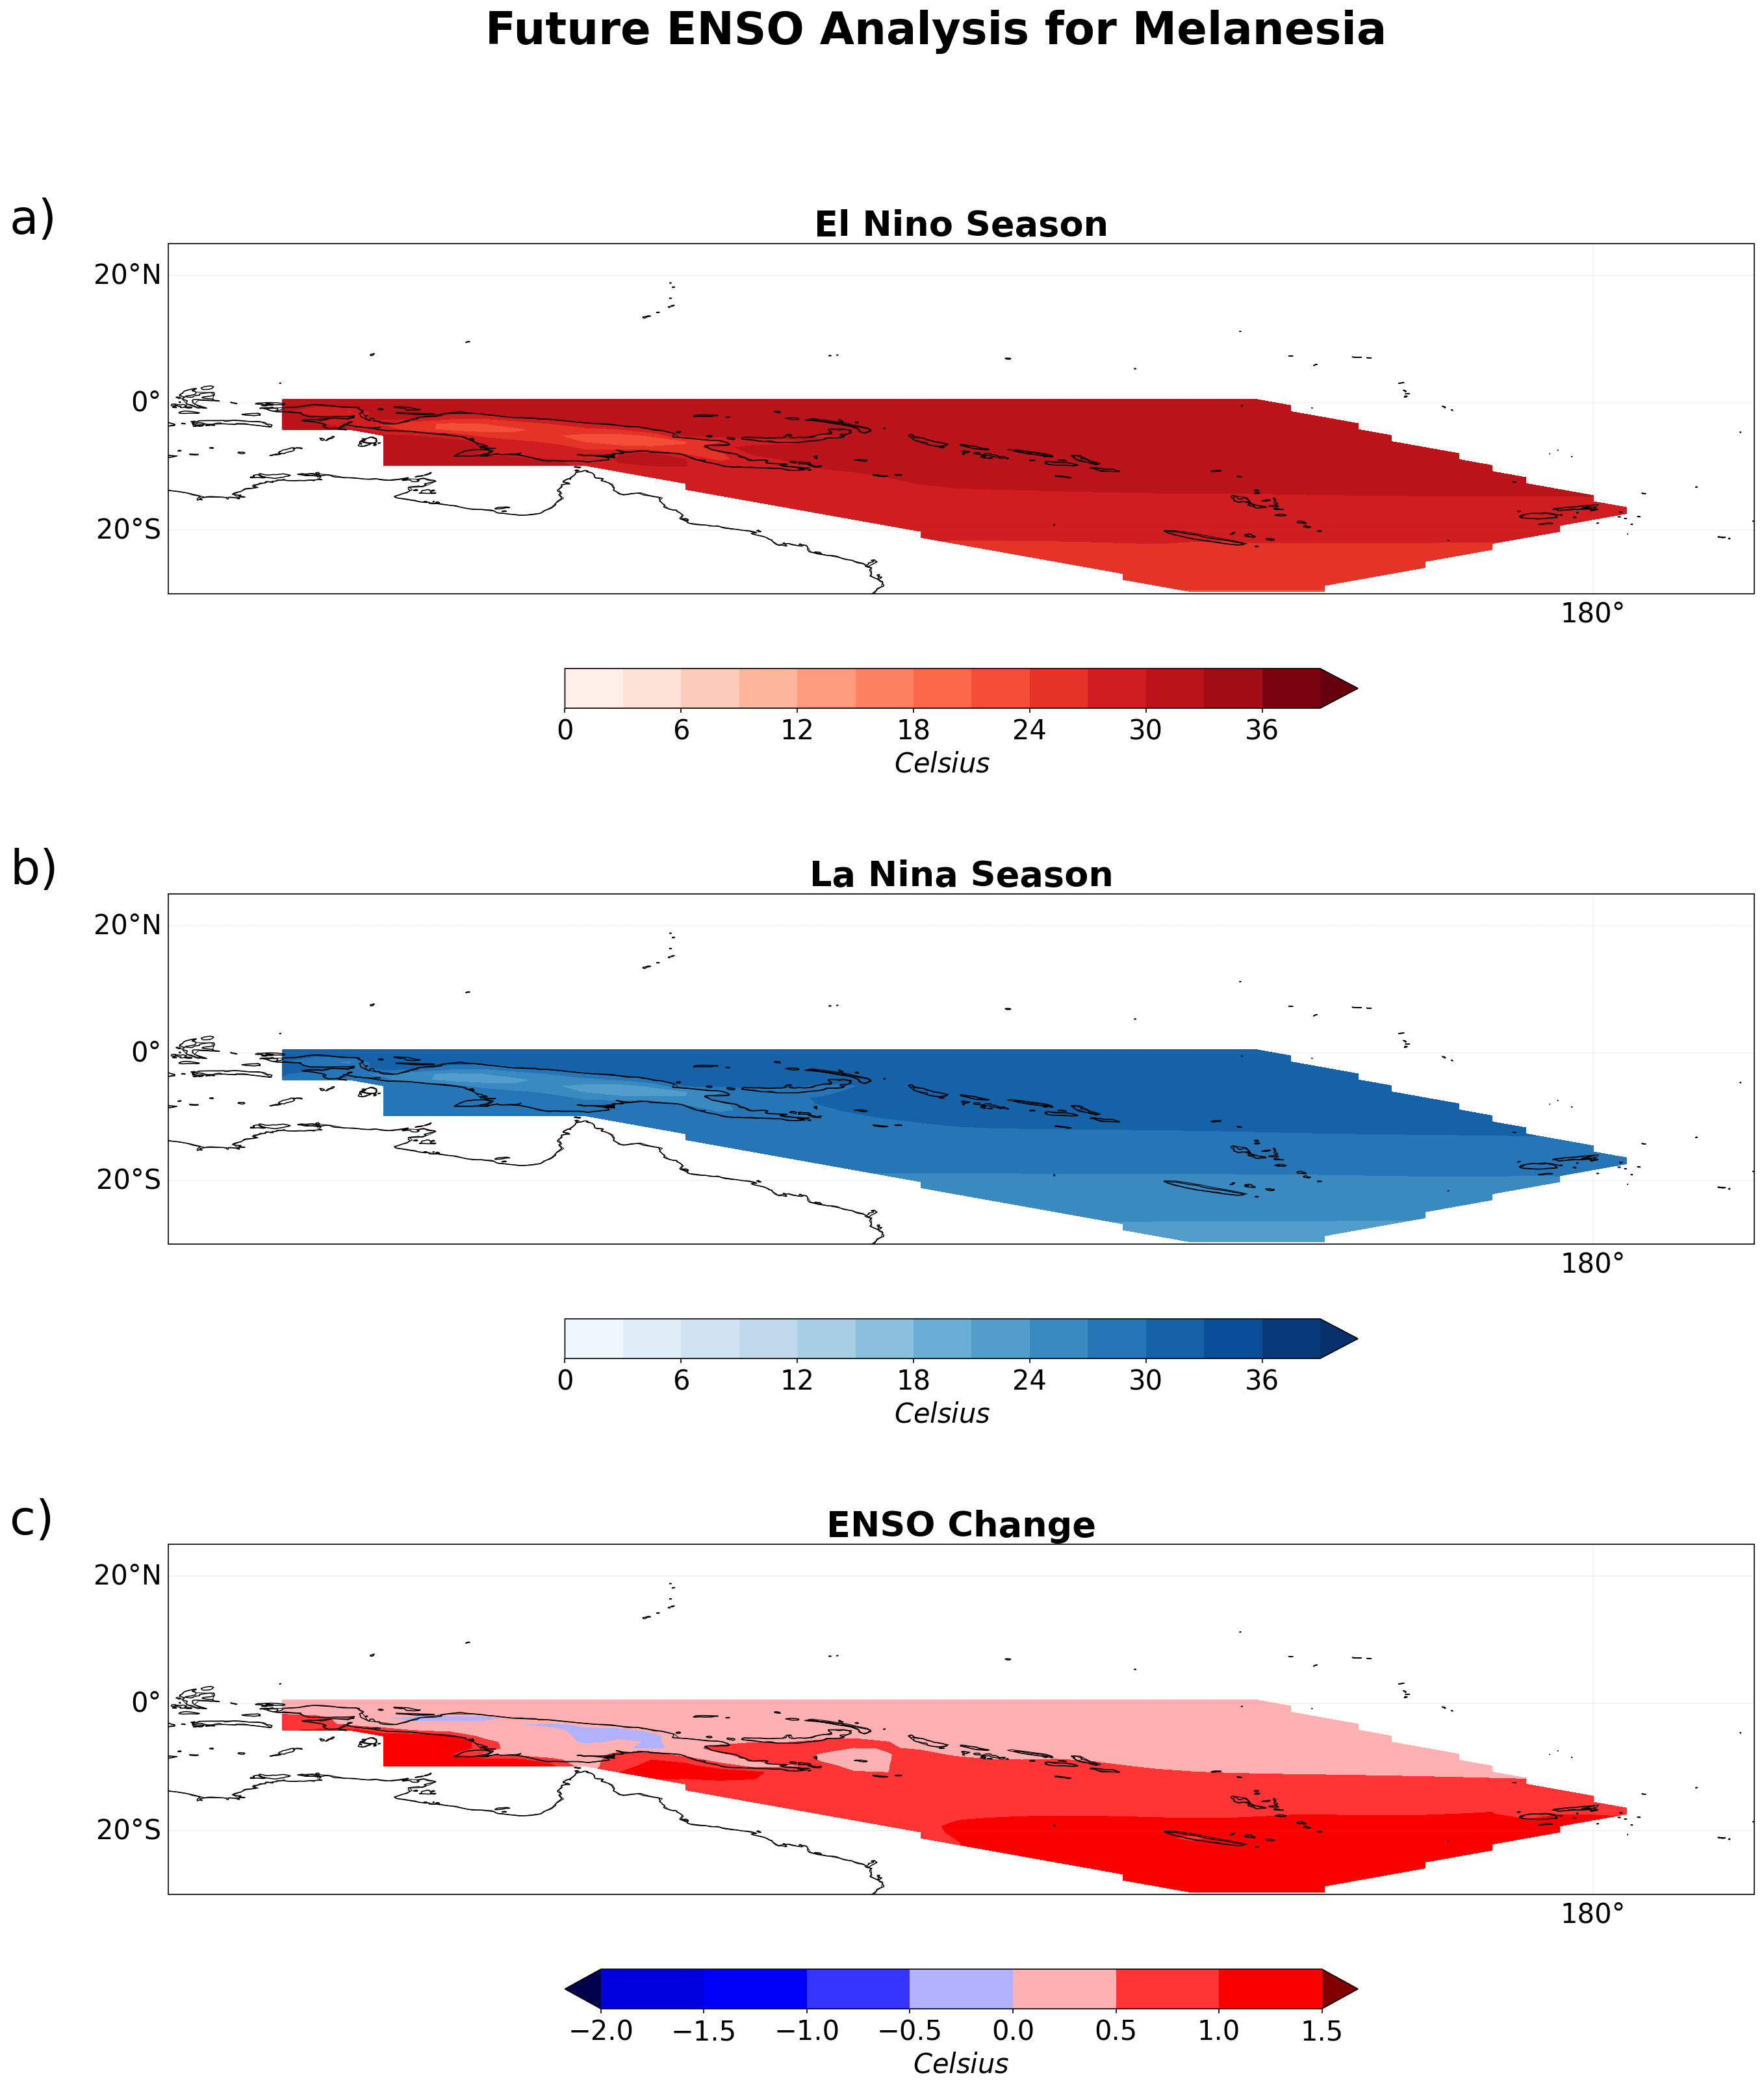

In [ ]:
#Plot future ENSO Analysis and ENSO Change for Polynesia
plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Future ENSO Analysis for '+str(Polynesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-13, 74, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Poly_future.lon,Temp_All_Ensembles_Oceanic_R_Poly_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Poly_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-13, 74, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Poly_future.lon,Temp_All_Ensembles_Oceanic_R_Poly_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Poly_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-13, 74, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Poly_future.lon,Temp_All_Ensembles_Oceanic_R_Poly_future.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Poly_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Poly_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()

#Plot future ENSO Analysis and ENSO Change for Micronesia
plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Future ENSO Analysis for '+str(Micronesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-53, 26, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Micro_future.lon,Temp_All_Ensembles_Oceanic_R_Micro_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Micro_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-53, 26, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Micro_future.lon,Temp_All_Ensembles_Oceanic_R_Micro_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Micro_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-53, 26, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Micro_future.lon,Temp_All_Ensembles_Oceanic_R_Micro_future.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Micro_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Micro_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()


#Plot future ENSO Analysis and ENSO Change for Melanesia
plotproj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(21.,24.),facecolor='white')
plt.suptitle('Future ENSO Analysis for '+str(Melanesia_Name),fontweight="bold",fontsize=33)#,y=3.35
gs = fig.add_gridspec(3, 1, hspace=0.3)
gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)
ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-53, 6, -30., 25.],plotproj)
clevs3 = np.arange(0,40,3)
cs3 = ax3.contourf(Temp_All_Ensembles_Oceanic_R_Melan_future.lon,Temp_All_Ensembles_Oceanic_R_Melan_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Melan_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs3, extend='max',cmap='Reds', transform=ccrs.PlateCarree())
plt.title('El Nino Season',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')

ax3.set_aspect("auto")

cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-53, 6, -30., 25.],plotproj)
clevs7 = np.arange(0,40,3)
cs7 = ax7.contourf(Temp_All_Ensembles_Oceanic_R_Melan_future.lon,Temp_All_Ensembles_Oceanic_R_Melan_future.lat,
                  (Temp_All_Ensembles_Oceanic_R_Melan_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs7, extend='max',cmap='Blues', transform=ccrs.PlateCarree())
plt.title('La Nina Season',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')

ax7.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$Celsius$')


#######################################################################################################################################################################################################################################################


ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-53, 6, -30., 25.],plotproj)
clevs11 = np.arange(-2,2,0.5)
cs11 = ax11.contourf(Temp_All_Ensembles_Oceanic_R_Melan_future.lon,Temp_All_Ensembles_Oceanic_R_Melan_future.lat,
                  ((Temp_All_Ensembles_Oceanic_R_Melan_future[:,np.where(mean_anomaly > 0)[0],:,:].mean(["Ensemble","time"], skipna = True))-Temp_All_Ensembles_Oceanic_R_Melan_future[:,np.where(mean_anomaly < 0)[0],:,:].mean(["Ensemble","time"], skipna = True)),
                  clevs11, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-10, vmax=10), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('ENSO Change',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')

ax11.set_aspect("auto")

cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()





In [ ]:
#Polynesia

# Find the Mean spatial average
Temp_All_Ensembles_Oceanic_R_Poly_spatial_avg = Temp_All_Ensembles_Oceanic_R_Poly.mean(["lat","lon", "Ensemble"],skipna = True)
Prec_All_Ensembles_Oceanic_R_Poly_spatial_avg = Prec_All_Ensembles_Oceanic_R_Poly.mean(["lat","lon", "Ensemble"],skipna = True)
Wind_All_Ensembles_Oceanic_R_Poly_spatial_avg = Wind_All_Ensembles_Oceanic_R_Poly.mean(["lat","lon", "Ensemble"],skipna = True)

# Make the weather data time into pandas
Temp_All_Ensembles_Oceanic_R_Poly_pd = Temp_All_Ensembles_Oceanic_R_Poly_spatial_avg.to_dataframe()
Temp_All_Ensembles_Oceanic_R_Poly_pd = Temp_All_Ensembles_Oceanic_R_Poly_pd.reset_index()

Prec_All_Ensembles_Oceanic_R_Poly_pd = Prec_All_Ensembles_Oceanic_R_Poly_spatial_avg.to_dataframe()
Prec_All_Ensembles_Oceanic_R_Poly_pd = Prec_All_Ensembles_Oceanic_R_Poly_pd.reset_index()

Wind_All_Ensembles_Oceanic_R_Poly_pd = Wind_All_Ensembles_Oceanic_R_Poly_spatial_avg.to_dataframe()
Wind_All_Ensembles_Oceanic_R_Poly_pd = Wind_All_Ensembles_Oceanic_R_Poly_pd.reset_index()

# Pairwise Correlation Heatmap
Weather_Oceanic_R_Poly = pd.concat([Temp_All_Ensembles_Oceanic_R_Poly_pd, Prec_All_Ensembles_Oceanic_R_Poly_pd['PRECT']], axis=1)
Weather_Oceanic_R_Poly = pd.concat([Weather_Oceanic_R_Poly, Wind_All_Ensembles_Oceanic_R_Poly_pd['WSPDSRFAV']], axis=1)
Weather_Oceanic_R_Poly



#Micronesia

# Find the Mean spatial average
Temp_All_Ensembles_Oceanic_R_Micro_spatial_avg = Temp_All_Ensembles_Oceanic_R_Micro.mean(["lat","lon", "Ensemble"],skipna = True)
Prec_All_Ensembles_Oceanic_R_Micro_spatial_avg = Prec_All_Ensembles_Oceanic_R_Micro.mean(["lat","lon", "Ensemble"],skipna = True)
Wind_All_Ensembles_Oceanic_R_Micro_spatial_avg = Wind_All_Ensembles_Oceanic_R_Micro.mean(["lat","lon", "Ensemble"],skipna = True)

# Make the weather data time into pandas
Temp_All_Ensembles_Oceanic_R_Micro_pd = Temp_All_Ensembles_Oceanic_R_Micro_spatial_avg.to_dataframe()
Temp_All_Ensembles_Oceanic_R_Micro_pd = Temp_All_Ensembles_Oceanic_R_Micro_pd.reset_index()

Prec_All_Ensembles_Oceanic_R_Micro_pd = Prec_All_Ensembles_Oceanic_R_Micro_spatial_avg.to_dataframe()
Prec_All_Ensembles_Oceanic_R_Micro_pd = Prec_All_Ensembles_Oceanic_R_Micro_pd.reset_index()

Wind_All_Ensembles_Oceanic_R_Micro_pd = Wind_All_Ensembles_Oceanic_R_Micro_spatial_avg.to_dataframe()
Wind_All_Ensembles_Oceanic_R_Micro_pd = Wind_All_Ensembles_Oceanic_R_Micro_pd.reset_index()

# Pairwise Correlation Heatmap
Weather_Oceanic_R_Micro = pd.concat([Temp_All_Ensembles_Oceanic_R_Micro_pd, Prec_All_Ensembles_Oceanic_R_Micro_pd['PRECT']], axis=1)
Weather_Oceanic_R_Micro = pd.concat([Weather_Oceanic_R_Micro, Wind_All_Ensembles_Oceanic_R_Micro_pd['WSPDSRFAV']], axis=1)
Weather_Oceanic_R_Micro




#Melanesia

# Find the Mean spatial average
Temp_All_Ensembles_Oceanic_R_Melan_spatial_avg = Temp_All_Ensembles_Oceanic_R_Melan.mean(["lat","lon", "Ensemble"],skipna = True)
Prec_All_Ensembles_Oceanic_R_Melan_spatial_avg = Prec_All_Ensembles_Oceanic_R_Melan.mean(["lat","lon", "Ensemble"],skipna = True)
Wind_All_Ensembles_Oceanic_R_Melan_spatial_avg = Wind_All_Ensembles_Oceanic_R_Melan.mean(["lat","lon", "Ensemble"],skipna = True)

# Make the weather data time into pandas
Temp_All_Ensembles_Oceanic_R_Melan_pd = Temp_All_Ensembles_Oceanic_R_Melan_spatial_avg.to_dataframe()
Temp_All_Ensembles_Oceanic_R_Melan_pd = Temp_All_Ensembles_Oceanic_R_Melan_pd.reset_index()

Prec_All_Ensembles_Oceanic_R_Melan_pd = Prec_All_Ensembles_Oceanic_R_Melan_spatial_avg.to_dataframe()
Prec_All_Ensembles_Oceanic_R_Melan_pd = Prec_All_Ensembles_Oceanic_R_Melan_pd.reset_index()

Wind_All_Ensembles_Oceanic_R_Melan_pd = Wind_All_Ensembles_Oceanic_R_Melan_spatial_avg.to_dataframe()
Wind_All_Ensembles_Oceanic_R_Melan_pd = Wind_All_Ensembles_Oceanic_R_Melan_pd.reset_index()

# Pairwise Correlation Heatmap
Weather_Oceanic_R_Melan = pd.concat([Temp_All_Ensembles_Oceanic_R_Melan_pd, Prec_All_Ensembles_Oceanic_R_Melan_pd['PRECT']], axis=1)
Weather_Oceanic_R_Melan = pd.concat([Weather_Oceanic_R_Melan, Wind_All_Ensembles_Oceanic_R_Melan_pd['WSPDSRFAV']], axis=1)
Weather_Oceanic_R_Melan

time         TS     PRECT  WSPDSRFAV
0    1970-02-01  28.786348  8.691712   5.394010
1    1970-03-01  29.060192  9.326250   5.120317
2    1970-04-01  29.079491  9.971779   5.483697
3    1970-05-01  28.698011  8.376172   5.635748
4    1970-06-01  28.079290  7.332415   6.229815
...         ...        ...       ...        ...
1015 2064-09-01  28.489353  5.024904   6.793920
1016 2064-10-01  28.466682  4.751757   7.074018
1017 2064-11-01  28.866776  5.362566   6.309006
1018 2064-12-01  29.422237  5.891737   5.668390
1019 2065-01-01  30.230879  6.873413   5.049993

[1020 rows x 4 columns]

In [ ]:
#Normalize

#Import Packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Normalizing Features
# Work on all features except the outcome so drop outcome
num_feats_Poly = Weather_Oceanic_R_Poly.drop('PRECT', axis=1).drop('time', axis=1)
num_feats_Micro = Weather_Oceanic_R_Micro.drop('PRECT', axis=1).drop('time', axis=1)
num_feats_Melan = Weather_Oceanic_R_Melan.drop('PRECT', axis=1).drop('time', axis=1)

#Standarize the Features
scaler = StandardScaler()

Weather_Oceanic_R_Poly[num_feats_Poly.columns] = scaler.fit_transform(num_feats_Poly)
Weather_Oceanic_R_Micro[num_feats_Micro.columns] = scaler.fit_transform(num_feats_Micro)
Weather_Oceanic_R_Melan[num_feats_Melan.columns] = scaler.fit_transform(num_feats_Melan)


In [ ]:
#View to see the data

Weather_Oceanic_R_Poly

time        TS     PRECT  WSPDSRFAV
0    1970-02-01 -0.203010  5.053812   0.423368
1    1970-03-01  0.068668  5.817320   0.096691
2    1970-04-01  0.315153  5.718647  -1.737867
3    1970-05-01  0.343718  5.874938  -1.988547
4    1970-06-01 -0.035152  5.288980  -1.358052
...         ...       ...       ...        ...
1015 2064-09-01  0.262219  3.659559   1.145859
1016 2064-10-01  0.124464  3.544398   0.623549
1017 2064-11-01  0.373683  3.826641  -0.886972
1018 2064-12-01  0.929582  4.382794  -1.487238
1019 2065-01-01  1.491556  5.165329   0.008760

[1020 rows x 4 columns]

In [ ]:
#Seperate the data into the training, development and testing set based on year

#Poly
Weather_Oceanic_R_Poly_train = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Poly_devlop = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Poly_test = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]


#Mico
Weather_Oceanic_R_Micro_train = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Micro_devlop = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Micro_test = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]


#Melan
Weather_Oceanic_R_Melan_train = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Melan_devlop = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Melan_test = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]


#Find the features used for prediction
weather_features = ['WSPDSRFAV', 'TS']

# Index training data on biochemical features
Weather_Oceanic_R_Poly_train_bf_X = Weather_Oceanic_R_Poly_train[weather_features]
Weather_Oceanic_R_Micro_train_bf_X = Weather_Oceanic_R_Micro_train[weather_features]
Weather_Oceanic_R_Melan_train_bf_X = Weather_Oceanic_R_Melan_train[weather_features]


# Index training data on the outcome, Salinity
Weather_Oceanic_R_Poly_train_out_y = Weather_Oceanic_R_Poly_train['PRECT']
Weather_Oceanic_R_Micro_train_out_y = Weather_Oceanic_R_Micro_train['PRECT']
Weather_Oceanic_R_Melan_train_out_y = Weather_Oceanic_R_Melan_train['PRECT']


In [ ]:
#View to see the data

print(Weather_Oceanic_R_Poly_train)

print("="*30)

print(Weather_Oceanic_R_Poly_train_bf_X)

print("="*30)

print(Weather_Oceanic_R_Poly_train_out_y)

print("="*30)

          time        TS     PRECT  WSPDSRFAV
0   1970-02-01 -0.203010  5.053812   0.423368
1   1970-03-01  0.068668  5.817320   0.096691
2   1970-04-01  0.315153  5.718647  -1.737867
3   1970-05-01  0.343718  5.874938  -1.988547
4   1970-06-01 -0.035152  5.288980  -1.358052
..         ...       ...       ...        ...
486 2010-08-01 -0.925149  4.087646   2.110547
487 2010-09-01 -1.289389  3.468491   0.725311
488 2010-10-01 -1.365478  3.421373   1.109873
489 2010-11-01 -1.124417  3.862819  -0.402754
490 2010-12-01 -0.643102  4.578600  -0.873886

[491 rows x 4 columns]
     WSPDSRFAV        TS
0     0.423368 -0.203010
1     0.096691  0.068668
2    -1.737867  0.315153
3    -1.988547  0.343718
4    -1.358052 -0.035152
..         ...       ...
486   2.110547 -0.925149
487   0.725311 -1.289389
488   1.109873 -1.365478
489  -0.402754 -1.124417
490  -0.873886 -0.643102

[491 rows x 2 columns]
0      5.053812
1      5.817320
2      5.718647
3      5.874938
4      5.288980
         ...   
486 

### Linear Regression

In [ ]:
#Import Packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

def Linear_Regression_Model(norm_bf_X, norm_true_out_y):

      # Linear regression model estimator
      linear_reg = LinearRegression()

      # Random forest regression model estimator
      randfor_reg = RandomForestRegressor()

      # Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) on devlopment data
      #Compute Recursive Feature Elimination
      norm_rfecv = RFECV(estimator=linear_reg, scoring='neg_mean_absolute_error')

      #Fit the Recursive Feature Elimination with the development data
      norm_rfecv.fit(norm_bf_X, norm_true_out_y)

      # Selected features
      main_feat = norm_bf_X.columns[norm_rfecv.support_]

      # Hyperparameter tuning for random forest regression domain
      Hyperpar_grid = {
          'n_estimators': [50, 100],
          'max_depth': [None, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2]
      }

      #Use Grid Search
      norm_grid_search = GridSearchCV(estimator=randfor_reg, param_grid=Hyperpar_grid, scoring='neg_mean_absolute_error', cv=5)
      norm_grid_search.fit(norm_bf_X[main_feat], norm_true_out_y)

      # Best hyperparameters found
      norm_best_params = norm_grid_search.best_params_

      # Best model estimator found
      norm_best_model = norm_grid_search.best_estimator_


      # Predict model on development set
      norm_dev_pred_best_y = norm_best_model.predict(norm_bf_X[main_feat])

      # Evaluate model on development set using MAE
      norm_MAE_dev_best = mean_absolute_error(norm_true_out_y, norm_dev_pred_best_y )

      #Print the results
      print("Development Set Mean Absolute Error (MAE) (Best Model):", norm_MAE_dev_best )
      print("Best Hyperparameters:", norm_best_params)

      return

In [ ]:
#Linear and Non Linear Regression Model for each Oceanic Region only on the training data

print("Polynesia")
Weather_Oceanic_R_Poly_train_LRM = Linear_Regression_Model(Weather_Oceanic_R_Poly_train_bf_X, Weather_Oceanic_R_Poly_train_out_y)
print("="*11)

print("Micronesia")
Weather_Oceanic_R_Micro_train_LRM = Linear_Regression_Model(Weather_Oceanic_R_Micro_train_bf_X, Weather_Oceanic_R_Micro_train_out_y)
print("="*11)

print("Melanesia")
Weather_Oceanic_R_Melan_train_LRM = Linear_Regression_Model(Weather_Oceanic_R_Melan_train_bf_X, Weather_Oceanic_R_Melan_train_out_y)
print("="*11)


Polynesia
Development Set Mean Absolute Error (MAE) (Best Model): 0.1240711426293525
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Micronesia
Development Set Mean Absolute Error (MAE) (Best Model): 0.28731666413606766
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Melanesia
Development Set Mean Absolute Error (MAE) (Best Model): 0.2070017014339661
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Logistic Regression

In [ ]:
#Import Packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Seperate the data into the training, development and testing set
#Poly
Weather_Oceanic_R_Poly_train_log = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Poly_devlop_log = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Poly_test_log = Weather_Oceanic_R_Poly[(pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Poly['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]


#Mico
Weather_Oceanic_R_Micro_train_log = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Micro_devlop_log = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Micro_test_log = Weather_Oceanic_R_Micro[(pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Micro['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]


#Melan
Weather_Oceanic_R_Melan_train_log = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 1970) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2010)]
Weather_Oceanic_R_Melan_devlop_log = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 2025) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2043)]
Weather_Oceanic_R_Melan_test_log = Weather_Oceanic_R_Melan[(pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') >= 2044) & (pd.to_numeric(Weather_Oceanic_R_Melan['time'].dt.strftime('%Y.'), errors='coerce') <= 2065)]



#Find the features used for prediction
weather_features = ['WSPDSRFAV', 'TS']


#Train
# Index training data on biochemical features
Weather_Oceanic_R_Poly_train_log_bf_X = Weather_Oceanic_R_Poly_train_log[weather_features]
Weather_Oceanic_R_Micro_train_log_bf_X = Weather_Oceanic_R_Micro_train_log[weather_features]
Weather_Oceanic_R_Melan_train_log_bf_X = Weather_Oceanic_R_Melan_train_log[weather_features]


# Index training data on the outcome,
Weather_Oceanic_R_Poly_train_log_out_y = Weather_Oceanic_R_Poly_train_log['PRECT']
Weather_Oceanic_R_Micro_train_log_out_y = Weather_Oceanic_R_Micro_train_log['PRECT']
Weather_Oceanic_R_Melan_train_log_out_y = Weather_Oceanic_R_Melan_train_log['PRECT']

#Develop
# Index devloping data on biochemical features
Weather_Oceanic_R_Poly_devlop_log_bf_X = Weather_Oceanic_R_Poly_devlop_log[weather_features]
Weather_Oceanic_R_Micro_devlop_log_bf_X = Weather_Oceanic_R_Micro_devlop_log[weather_features]
Weather_Oceanic_R_Melan_devlop_log_bf_X = Weather_Oceanic_R_Melan_devlop_log[weather_features]


# Index devloping data on the outcome,
Weather_Oceanic_R_Poly_devlop_log_out_y = Weather_Oceanic_R_Poly_devlop_log['PRECT']
Weather_Oceanic_R_Micro_devlop_log_out_y = Weather_Oceanic_R_Micro_devlop_log['PRECT']
Weather_Oceanic_R_Melan_devlop_log_out_y = Weather_Oceanic_R_Melan_devlop_log['PRECT']

#Test
# Index testing data on biochemical features
Weather_Oceanic_R_Poly_test_log_bf_X = Weather_Oceanic_R_Poly_test_log[weather_features]
Weather_Oceanic_R_Micro_test_log_bf_X = Weather_Oceanic_R_Micro_test_log[weather_features]
Weather_Oceanic_R_Melan_test_log_bf_X = Weather_Oceanic_R_Melan_test_log[weather_features]


# Index testing data on the outcome,
Weather_Oceanic_R_Poly_test_log_out_y = Weather_Oceanic_R_Poly_test_log['PRECT']
Weather_Oceanic_R_Micro_test_log_out_y = Weather_Oceanic_R_Micro_test_log['PRECT']
Weather_Oceanic_R_Melan_test_log_out_y = Weather_Oceanic_R_Melan_test_log['PRECT']


#Lograitmic

# Binarize salinity outcome based on the mean on training set
Prec_Poly_mean_train = Weather_Oceanic_R_Poly_train_log_out_y.mean()
Prec_Poly_mean_devlop = Weather_Oceanic_R_Poly_devlop_log_out_y.mean()
Prec_Poly_mean_test = Weather_Oceanic_R_Poly_test_log_out_y.mean()

Prec_Micro_mean_train = Weather_Oceanic_R_Micro_train_log_out_y.mean()
Prec_Micro_mean_devlop = Weather_Oceanic_R_Micro_devlop_log_out_y.mean()
Prec_Micro_mean_test = Weather_Oceanic_R_Micro_test_log_out_y.mean()

Prec_Melan_mean_train = Weather_Oceanic_R_Melan_train_log_out_y.mean()
Prec_Melan_mean_devlop = Weather_Oceanic_R_Melan_devlop_log_out_y.mean()
Prec_Melan_mean_test = Weather_Oceanic_R_Melan_test_log_out_y.mean()



#Create a new column of the Classification on training set
Weather_Oceanic_R_Poly_train_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Poly_train_log_out_y > Prec_Poly_mean_train, 1, -1)
Weather_Oceanic_R_Poly_devlop_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Poly_devlop_log_out_y > Prec_Poly_mean_devlop, 1, -1)
Weather_Oceanic_R_Poly_test_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Poly_test_log_out_y > Prec_Poly_mean_test, 1, -1)

Weather_Oceanic_R_Micro_train_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Micro_train_log_out_y > Prec_Micro_mean_train, 1, -1)
Weather_Oceanic_R_Micro_devlop_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Micro_devlop_log_out_y > Prec_Micro_mean_devlop, 1, -1)
Weather_Oceanic_R_Micro_test_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Micro_test_log_out_y > Prec_Micro_mean_test, 1, -1)

Weather_Oceanic_R_Melan_train_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Melan_train_log_out_y > Prec_Melan_mean_train, 1, -1)
Weather_Oceanic_R_Melan_devlop_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Melan_devlop_log_out_y > Prec_Melan_mean_devlop, 1, -1)
Weather_Oceanic_R_Melan_test_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Melan_test_log_out_y > Prec_Melan_mean_test, 1, -1)




<ipython-input-203-090d2e3741e6>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_Oceanic_R_Poly_train_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Poly_train_log_out_y > Prec_Poly_mean_train, 1, -1)
<ipython-input-203-090d2e3741e6>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_Oceanic_R_Poly_train_log_out_y['PRECT_Log_Class'] = np.where(Weather_Oceanic_R_Poly_train_log_out_y > Prec_Poly_mean_train, 1, -1)
<ipython-input-203-090d2e3741e6>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
#View to see the data

print(Weather_Oceanic_R_Poly_train_log)

print("="*11)

print(Weather_Oceanic_R_Poly_train_log_bf_X)

print("="*11)

print(Weather_Oceanic_R_Poly_train_log_out_y)

          time        TS     PRECT  WSPDSRFAV
0   1970-02-01 -0.203010  5.053812   0.423368
1   1970-03-01  0.068668  5.817320   0.096691
2   1970-04-01  0.315153  5.718647  -1.737867
3   1970-05-01  0.343718  5.874938  -1.988547
4   1970-06-01 -0.035152  5.288980  -1.358052
..         ...       ...       ...        ...
486 2010-08-01 -0.925149  4.087646   2.110547
487 2010-09-01 -1.289389  3.468491   0.725311
488 2010-10-01 -1.365478  3.421373   1.109873
489 2010-11-01 -1.124417  3.862819  -0.402754
490 2010-12-01 -0.643102  4.578600  -0.873886

[491 rows x 4 columns]
     WSPDSRFAV        TS
0     0.423368 -0.203010
1     0.096691  0.068668
2    -1.737867  0.315153
3    -1.988547  0.343718
4    -1.358052 -0.035152
..         ...       ...
486   2.110547 -0.925149
487   0.725311 -1.289389
488   1.109873 -1.365478
489  -0.402754 -1.124417
490  -0.873886 -0.643102

[491 rows x 2 columns]
0                                                           5.053812
1                              

In [ ]:
def logistic_regression_model(norm_train_log_bf_X, norm_train_log_out_y, norm_test_log_bf_X, norm_test_log_out_y):


      # Logistic regression model estimator
      logistic_reg = LogisticRegression()

      # Define hyperparameters to tune with regularization
      Hyperpar_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'penalty': ['l1', 'l2']}

      # Hyperparameter tuning for logistic regression using Grid Search
      norm_train_grid_search = GridSearchCV(estimator=logistic_reg,
                                param_grid=Hyperpar_grid,
                                scoring='accuracy',
                                cv=5)
      norm_train_grid_search.fit(norm_train_log_bf_X, norm_train_log_out_y)

      # Best hyperparameters found
      norm_train_best_params = norm_train_grid_search.best_params_

      # Best model found
      norm_train_best_model = norm_train_grid_search.best_estimator_

      # Predict the model on test set
      norm_y_pred_test = norm_train_best_model.predict(norm_test_log_bf_X)

      # Evaluate model on test set based on accuracy score
      norm_accuracy_test = accuracy_score(norm_test_log_out_y, norm_y_pred_test)

      print("Best Hyperparameters:", norm_train_best_params)
      print("Accuracy on Test Data:", norm_accuracy_test)

      return

In [ ]:
#Logistic Regression Model for each Oceanic Region on the training and testing data

print("Polynesia")
Weather_Oceanic_R_Poly_train_LogRM = logistic_regression_model(Weather_Oceanic_R_Poly_train_log_bf_X, Weather_Oceanic_R_Poly_train_log_out_y['PRECT_Log_Class'], Weather_Oceanic_R_Poly_test_log_bf_X, Weather_Oceanic_R_Poly_test_log_out_y['PRECT_Log_Class'])
print("="*11)

print("Micronesia")
Weather_Oceanic_R_Micro_train_LogRM = logistic_regression_model(Weather_Oceanic_R_Micro_train_log_bf_X, Weather_Oceanic_R_Micro_train_log_out_y['PRECT_Log_Class'], Weather_Oceanic_R_Micro_test_log_bf_X, Weather_Oceanic_R_Micro_test_log_out_y['PRECT_Log_Class'])
print("="*11)

print("Melanesia")
Weather_Oceanic_R_Melan_train_LogRM = logistic_regression_model(Weather_Oceanic_R_Melan_train_log_bf_X, Weather_Oceanic_R_Melan_train_log_out_y['PRECT_Log_Class'], Weather_Oceanic_R_Melan_test_log_bf_X, Weather_Oceanic_R_Melan_test_log_out_y['PRECT_Log_Class'])
print("="*11)


Polynesia


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy on Test Data: 0.5138339920948617
Micronesia


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy on Test Data: 0.549407114624506
Melanesia
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy on Test Data: 0.4743083003952569


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

*Resutlts*

Polynesia:

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Accuracy on Test Data: 0.5138339920948617

===========
Micronesia:

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}

Accuracy on Test Data: 0.549407114624506

===========

Melanesia:

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}

Accuracy on Test Data: 0.4743083003952569


===========

6) What are the primary meteorological variables to severely impact the oceanic regions based on magnitude?

In [ ]:
def Linear_Regression_Model_Important_Features(norm_bf_X, norm_true_out_y, Ocean_Region_inst):

      #Find the features used for prediction
      weather_features = ['WSPDSRFAV', 'TS']

      # Linear regression model estimator
      linear_reg = LinearRegression()

      # Random forest regression model estimator
      randfor_reg = RandomForestRegressor()

      #Fit the Recursive Feature Elimination with the development data
      randfor_reg.fit(norm_bf_X, norm_true_out_y)

      importances = randfor_reg.feature_importances_
      print(importances)

      feat_importances = pd.Series(importances, index=weather_features)

      plt.rcParams.update({'font.size': 10})
      fig, ax = plt.subplots()
      feat_importances.plot.bar(y=importances*100, ax=ax)
      ax.set_title("Feature Importances for "+str(Ocean_Region_inst))
      ax.set_ylabel("Feature \n Importances \n Percentage")
      fig.tight_layout()

      return

Ocean_Region_names = ["Polynesia", "Micronesia", "Melanesia"]

Polynesia
[0.05100927 0.94899073]
Micronesia
[0.10951039 0.89048961]
Melanesia
[0.06755424 0.93244576]


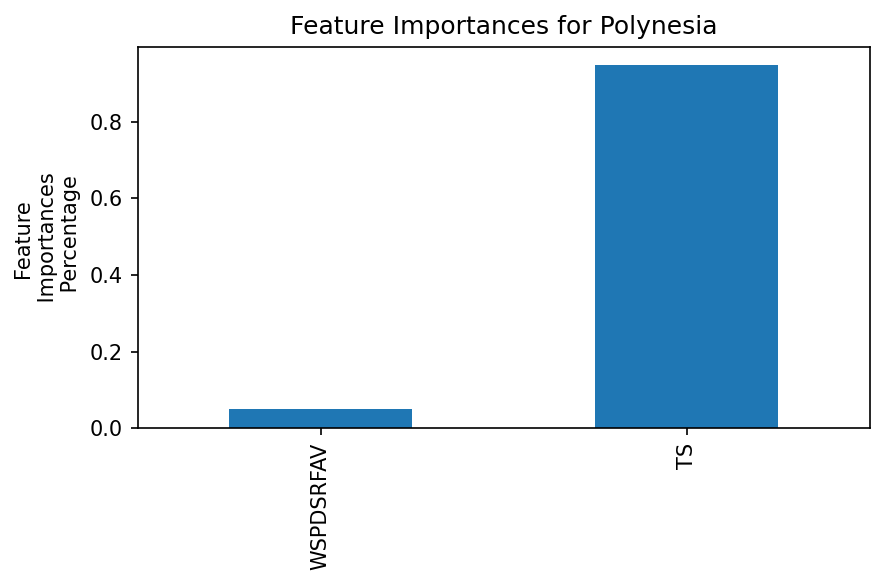

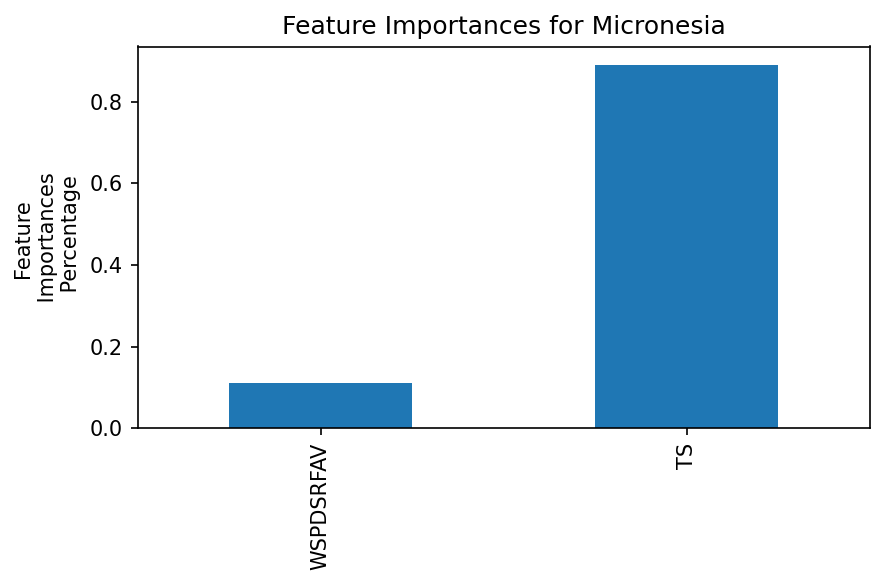

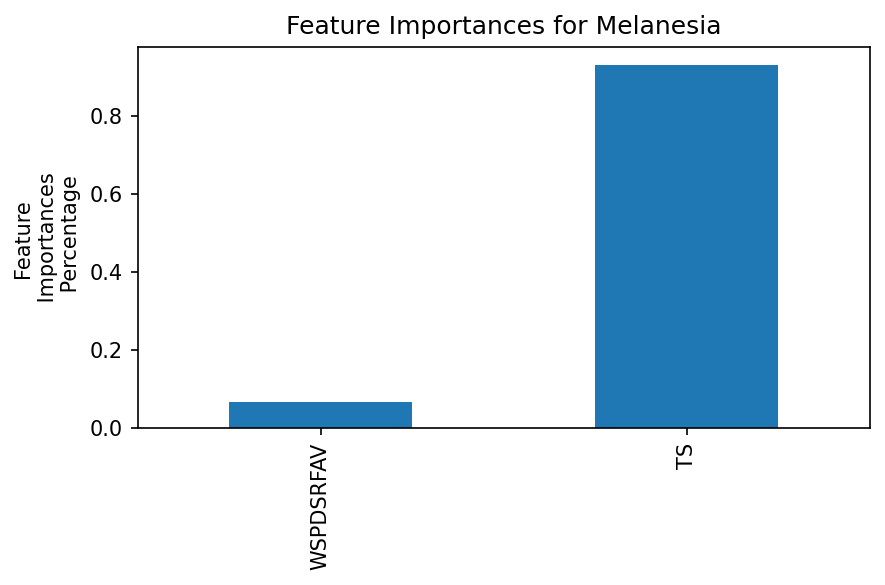

In [ ]:

print("Polynesia")
Weather_Oceanic_R_Poly_train_LRM_IF = Linear_Regression_Model_Important_Features(Weather_Oceanic_R_Poly_train_bf_X, Weather_Oceanic_R_Poly_train_out_y, Ocean_Region_names[0])
print("="*11)

print("Micronesia")
Weather_Oceanic_R_Micro_train_LRM_IF = Linear_Regression_Model_Important_Features(Weather_Oceanic_R_Micro_train_bf_X, Weather_Oceanic_R_Micro_train_out_y, Ocean_Region_names[1])
print("="*11)

print("Melanesia")
Weather_Oceanic_R_Melan_train_LRM_IF = Linear_Regression_Model_Important_Features(Weather_Oceanic_R_Melan_train_bf_X, Weather_Oceanic_R_Melan_train_out_y, Ocean_Region_names[2])
print("="*11)


7) How does the historical reanalysis data of the Oceanic Regions and their associated islands compare to its predictive data?

In [ ]:
#Import Packages
import time
import math
import pandas as pd
import keras
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.layers import BatchNormalization, LeakyReLU
from keras.initializers import GlorotNormal

In [ ]:
# Split data into train, test, and validation sets

Temp_NN_R_Poly_train = Temp_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('1970-01','2010-01'))]
Temp_NN_R_Poly_test = Temp_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('2025-01','2043-01'))]
Temp_NN_R_Poly_val = Temp_All_Ensembles_Oceanic_R_Poly.loc[dict(time=slice('2044-01','2065-01'))]

Temp_NN_R_Micro_train = Temp_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('1970-01','2010-01'))]
Temp_NN_R_Micro_test = Temp_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('2025-01','2043-01'))]
Temp_NN_R_Micro_val = Temp_All_Ensembles_Oceanic_R_Micro.loc[dict(time=slice('2044-01','2065-01'))]

Temp_NN_R_Melan_train = Temp_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('1970-01','2010-01'))]
Temp_NN_R_Melan_test = Temp_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('2025-01','2043-01'))]
Temp_NN_R_Melan_val = Temp_All_Ensembles_Oceanic_R_Melan.loc[dict(time=slice('2044-01','2065-01'))]

#Split into featues and outcome

#Poly
Temp_NN_R_Poly_X_train = Temp_NN_R_Poly_train.mean(["time"])
Temp_NN_R_Poly_y_train = np.expand_dims(Temp_NN_R_Poly_train.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Poly_X_test = Temp_NN_R_Poly_test.mean(["time"])
Temp_NN_R_Poly_y_test = np.expand_dims(Temp_NN_R_Poly_test.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Poly_X_val = Temp_NN_R_Poly_val.mean(["time"])
Temp_NN_R_Poly_y_val = np.expand_dims(Temp_NN_R_Poly_val.mean(["time","lat", "lon"]), axis=1)

#Poly
Temp_NN_R_Micro_X_train = Temp_NN_R_Micro_train.mean(["time"])
Temp_NN_R_Micro_y_train = np.expand_dims(Temp_NN_R_Micro_train.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Micro_X_test = Temp_NN_R_Micro_test.mean(["time"])
Temp_NN_R_Micro_y_test = np.expand_dims(Temp_NN_R_Micro_test.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Micro_X_val = Temp_NN_R_Micro_val.mean(["time"])
Temp_NN_R_Micro_y_val = np.expand_dims(Temp_NN_R_Micro_val.mean(["time","lat", "lon"]), axis=1)

#Poly
Temp_NN_R_Melan_X_train = Temp_NN_R_Melan_train.mean(["time"])
Temp_NN_R_Melan_y_train = np.expand_dims(Temp_NN_R_Melan_train.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Melan_X_test = Temp_NN_R_Melan_test.mean(["time"])
Temp_NN_R_Melan_y_test = np.expand_dims(Temp_NN_R_Melan_test.mean(["time","lat", "lon"]), axis=1)
Temp_NN_R_Melan_X_val = Temp_NN_R_Melan_val.mean(["time"])
Temp_NN_R_Melan_y_val = np.expand_dims(Temp_NN_R_Melan_val.mean(["time","lat", "lon"]), axis=1)



# Check number of samples (50000 in training and 10000 in test)

# Each image has 32 x 32 pixels
print("Polynesia")
print("Train Feature Shape: ", Temp_NN_R_Poly_X_train.shape, "Train Outcome Shape: ", Temp_NN_R_Poly_y_train.shape)
print("Test Feature Shape: ", Temp_NN_R_Poly_X_test.shape, "Test Outcome Shape: ", Temp_NN_R_Poly_y_test.shape)
print("Val Feature Shape: ", Temp_NN_R_Poly_X_val.shape, "Val Outcome Shape: ", Temp_NN_R_Poly_y_val.shape)
print(" ")

print("Micronesia")
print("Train Feature Shape: ", Temp_NN_R_Micro_X_train.shape, "Train Outcome Shape: ", Temp_NN_R_Micro_y_train.shape)
print("Test Feature Shape: ", Temp_NN_R_Micro_X_test.shape, "Test Outcome Shape: ", Temp_NN_R_Micro_y_test.shape)
print("Val Feature Shape: ", Temp_NN_R_Micro_X_val.shape, "Val Outcome Shape: ", Temp_NN_R_Micro_y_val.shape)
print(" ")

print("Melanesia")
print("Train Feature Shape: ", Temp_NN_R_Melan_X_train.shape, "Train Outcome Shape: ", Temp_NN_R_Melan_y_train.shape)
print("Test Feature Shape: ", Temp_NN_R_Melan_X_test.shape, "Test Outcome Shape: ", Temp_NN_R_Melan_y_test.shape)
print("Val Feature Shape: ", Temp_NN_R_Melan_X_val.shape, "Val Outcome Shape: ", Temp_NN_R_Melan_y_val.shape)
print(" ")


# Preprocessing: Normalize the images.
Temp_NN_R_Poly_X_train_norm = (Temp_NN_R_Poly_X_train / 255)
Temp_NN_R_Poly_X_test_norm = (Temp_NN_R_Poly_X_test / 255)
Temp_NN_R_Poly_X_val_norm = (Temp_NN_R_Poly_X_val / 255)

Temp_NN_R_Micro_X_train_norm = (Temp_NN_R_Micro_X_train / 255)
Temp_NN_R_Micro_X_test_norm = (Temp_NN_R_Micro_X_test / 255)
Temp_NN_R_Micro_X_val_norm = (Temp_NN_R_Micro_X_val / 255)

Temp_NN_R_Melan_X_train_norm = (Temp_NN_R_Melan_X_train / 255)
Temp_NN_R_Melan_X_test_norm = (Temp_NN_R_Melan_X_test / 255)
Temp_NN_R_Melan_X_val_norm = (Temp_NN_R_Melan_X_val / 255)



Polynesia
Train Feature Shape:  (10, 59, 107) Train Outcome Shape:  (10, 1)
Test Feature Shape:  (10, 59, 107) Test Outcome Shape:  (10, 1)
Val Feature Shape:  (10, 59, 107) Val Outcome Shape:  (10, 1)
 
Micronesia
Train Feature Shape:  (10, 59, 107) Train Outcome Shape:  (10, 1)
Test Feature Shape:  (10, 59, 107) Test Outcome Shape:  (10, 1)
Val Feature Shape:  (10, 59, 107) Val Outcome Shape:  (10, 1)
 
Melanesia
Train Feature Shape:  (10, 59, 107) Train Outcome Shape:  (10, 1)
Test Feature Shape:  (10, 59, 107) Test Outcome Shape:  (10, 1)
Val Feature Shape:  (10, 59, 107) Val Outcome Shape:  (10, 1)
 


In [ ]:
#View more of the data

print(Temp_NN_R_Poly_train)

print("="*74)

print(Temp_NN_R_Poly_X_train)

print("="*74)

print(Temp_NN_R_Poly_y_train)

print("="*74)

print(Temp_NN_R_Poly_X_train_norm)

<xarray.DataArray 'TS' (Ensemble: 10, time: 480, lat: 59, lon: 107)>
dask.array<getitem, shape=(10, 480, 59, 107), dtype=float32, chunksize=(1, 2, 59, 107), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2010-01-01
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 248.8 250.0 251.2 252.5
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 23.09 24.03 24.97
Dimensions without coordinates: Ensemble
<xarray.DataArray 'TS' (Ensemble: 10, lat: 59, lon: 107)>
dask.array<mean_agg-aggregate, shape=(10, 59, 107), dtype=float32, chunksize=(1, 59, 107), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 120.0 121.2 122.5 123.8 ... 248.8 250.0 251.2 252.5
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 23.09 24.03 24.97
Dimensions without coordinates: Ensemble
[[27.310928]
 [27.234715]
 [27.22377 ]
 [27.244665]
 [27.325333]
 [27.268538]
 [27.316328]
 [27.292969]
 [27.27347 ]
 [27.310663]]
<xarray.DataArray 'TS' 

Forward Neural Network

In [ ]:
#FNN MODEL CREATION
#FNN only use stack of **Dense** and **Dropout** Layers
#When training the data there needs to be a dropout (more robust)
def FNN_model(num_layers, num_nodes, activat_fun, dropout, weight_reg):
  #Layer 1
  model = Sequential([Dense(num_nodes[0], input_shape=(6313,), kernel_initializer=GlorotNormal(),
                            activation=activat_fun),
                      BatchNormalization(),
                      Dropout(dropout[0])
  ])

  #Model Used for Each Layer
  for i in range(num_layers-1):
    model.add(Dense(num_nodes[i+1], activation=activat_fun, kernel_initializer=GlorotNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(dropout[i+1]))
  model.add(Dense(1, activation='linear', kernel_initializer=GlorotNormal()))

  #Model Summary
  model.summary()

  return model

# Function to train and evaluate model for given hyperparameters
def FNN_model_evaluation(hyperparam, flatten_X_train, y_train, flatten_X_test, y_test, flatten_X_val, y_val):

    #FNN model
    model = FNN_model(**hyperparam)


    # Model Compile Requirements: A loss criterion, Optimizer, and Metrics
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


    # Train model
    history = model.fit(flatten_X_train, y_train[:,0], epochs=10, batch_size=128, validation_data=(flatten_X_val, y_val[:,0]))


    # Evaluate model
    train_loss, train_acc = model.evaluate(flatten_X_test, y_test[:,0])
    val_loss, val_acc = model.evaluate(flatten_X_val, y_val[:,0])

    # Number of parameters
    num_params = model.count_params()

    #Save output
    return {
        'hyperparameters': hyperparam,
        'train_loss': train_loss,
        'train_accuracy': train_acc,
        'val_loss': val_loss,
        'val_accuracy': val_acc,
        'num_params': num_params,
        'history': history.history
    }


In [ ]:

# (1) Monitor the loss on the train and validation set across the epochs of the FNN training;

# Flatten the images into vectors (1D) for feed forward network
#Poly
Temp_NN_R_Poly_flatten_X_train = np.nan_to_num(Temp_NN_R_Poly_X_train_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Poly_flatten_X_test = np.nan_to_num(Temp_NN_R_Poly_X_test_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Poly_flatten_X_val = np.nan_to_num(Temp_NN_R_Poly_X_val_norm.values.reshape((-1, 59*107)), nan=0.0)

#Micro
Temp_NN_R_Micro_flatten_X_train = np.nan_to_num(Temp_NN_R_Micro_X_train_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Micro_flatten_X_test = np.nan_to_num(Temp_NN_R_Micro_X_test_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Micro_flatten_X_val = np.nan_to_num(Temp_NN_R_Micro_X_val_norm.values.reshape((-1, 59*107)), nan=0.0)

#Melan
Temp_NN_R_Melan_flatten_X_train = np.nan_to_num(Temp_NN_R_Melan_X_train_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Melan_flatten_X_test = np.nan_to_num(Temp_NN_R_Melan_X_test_norm.values.reshape((-1, 59*107)), nan=0.0)
Temp_NN_R_Melan_flatten_X_val = np.nan_to_num(Temp_NN_R_Melan_X_val_norm.values.reshape((-1, 59*107)), nan=0.0)


#Save the results
FNN_Poly_model_eval_results = []
FNN_Micro_model_eval_results = []
FNN_Melan_model_eval_results = []


In [ ]:
#View to see the data
print(Temp_NN_R_Poly_flatten_X_train)
print(Temp_NN_R_Poly_flatten_X_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 6313)


In [ ]:
# Hyperparameter for # layers, # nodes per layer, activation function, dropout, weight regularization
hyperparam = [
    {'num_layers': 3, 'num_nodes': [10, 8, 8], 'activat_fun': 'linear', 'dropout': [0.1, 0.1, 0.2], 'weight_reg': regularizers.L1(0.006)},
    {'num_layers': 3, 'num_nodes': [128, 64, 32], 'activat_fun': 'linear', 'dropout': [0.15, 0.1, 0.05], 'weight_reg': regularizers.L2(0.0002)},
    {'num_layers': 4, 'num_nodes': [64, 64, 64, 32], 'activat_fun': 'linear', 'dropout': [0, 0, 0.05, 0], 'weight_reg': regularizers.L2(l2=0.0004)}
]


#Run model through each hyperparameter
for params in hyperparam:
    #Run the Model
    FNN_Poly_model_eval_result = FNN_model_evaluation(params, Temp_NN_R_Poly_flatten_X_train,
                                                 Temp_NN_R_Poly_y_train,
                                                 Temp_NN_R_Poly_flatten_X_test,
                                                 Temp_NN_R_Poly_y_test,
                                                 Temp_NN_R_Poly_flatten_X_val,
                                                 Temp_NN_R_Poly_y_val)
    FNN_Poly_model_eval_results.append(FNN_Poly_model_eval_result)

    FNN_Micro_model_eval_result = FNN_model_evaluation(params, Temp_NN_R_Micro_flatten_X_train,
                                                 Temp_NN_R_Micro_y_train,
                                                 Temp_NN_R_Micro_flatten_X_test,
                                                 Temp_NN_R_Micro_y_test,
                                                 Temp_NN_R_Micro_flatten_X_val,
                                                 Temp_NN_R_Micro_y_val)
    FNN_Micro_model_eval_results.append(FNN_Micro_model_eval_result)

    FNN_Melan_model_eval_result = FNN_model_evaluation(params, Temp_NN_R_Melan_flatten_X_train,
                                                 Temp_NN_R_Melan_y_train,
                                                 Temp_NN_R_Melan_flatten_X_test,
                                                 Temp_NN_R_Melan_y_test,
                                                 Temp_NN_R_Melan_flatten_X_val,
                                                 Temp_NN_R_Melan_y_val)
    FNN_Melan_model_eval_results.append(FNN_Melan_model_eval_result)


#Results for  Hyperparameters, Training, and Validation
print("Polynesia")
for i, FMER in enumerate(FNN_Poly_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {FMER['hyperparameters']}")
    print(f"Training Loss: {FMER['train_loss']:.4f}, Training Accuracy: {FMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {FMER['val_loss']:.4f}, Validation Accuracy: {FMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {FMER['num_params']}")
    print()
print()

print("Micronesia")
for i, FMER in enumerate(FNN_Micro_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {FMER['hyperparameters']}")
    print(f"Training Loss: {FMER['train_loss']:.4f}, Training Accuracy: {FMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {FMER['val_loss']:.4f}, Validation Accuracy: {FMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {FMER['num_params']}")
    print()
print()

print("Melanesia")
for i, FMER in enumerate(FNN_Melan_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {FMER['hyperparameters']}")
    print(f"Training Loss: {FMER['train_loss']:.4f}, Training Accuracy: {FMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {FMER['val_loss']:.4f}, Validation Accuracy: {FMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {FMER['num_params']}")
    print()
print()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_261 (Dense)           (None, 10)                63140     
                                                                 
 batch_normalization_168 (B  (None, 10)                40        
 atchNormalization)                                              
                                                                 
 dropout_198 (Dropout)       (None, 10)                0         
                                                                 
 dense_262 (Dense)           (None, 8)                 88        
                                                                 
 batch_normalization_169 (B  (None, 8)                 32        
 atchNormalization)                                              
                                                                 
 dropout_199 (Dropout)       (None, 8)               

Convolution Neural Network

In [ ]:
#CNN MODEL CREATION
#CNN for the Layers
#When training the data there needs to be a dropout (more robust)
def CNN_model(num_layers, num_filters, filt_size, kern_size, stride_size, num_nodes, activat_fun, dropout):

  #Layer 1
  model = Sequential([Conv2D(num_filters[0], kern_size, strides=stride_size,
                             kernel_initializer=GlorotNormal(), activation=activat_fun,
                             padding='same', input_shape=(59, 107, 1))])
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=filt_size))

  #Model Used for Each Layer
  for i in range(1, num_layers):
      model.add(Conv2D(num_filters[i], kern_size, kernel_initializer=GlorotNormal(),
                       strides=stride_size, activation=activat_fun, padding='same'))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=filt_size))
  model.add(Flatten())

  #CNN Combination
  for j in range(num_layers):
    model.add(Dense(num_nodes[j], kernel_initializer=GlorotNormal(), activation=activat_fun))
    model.add(BatchNormalization())
    model.add(Dropout(dropout[j]))
  model.add(Dense(1, activation='linear', kernel_initializer=GlorotNormal(),))


  return model



# Function to train and evaluate model for given hyperparameters
def CNN_model_evaluation(hyperparam_CNN, X_train_3D, y_train, X_test_3D, y_test, X_val_3D, y_val):


    #CNN model
    model = CNN_model(**hyperparam_CNN)

    # Model Compile Requirements: A loss criterion, Optimizer, and Metrics
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    #Model Summary
    print(model.summary())

    # Train model
    history = model.fit(X_train_3D, to_categorical(y_train), epochs=10, batch_size=128, validation_data=(X_val_3D, to_categorical(y_val)), callbacks=[early_stopping], verbose=2)

    # Evaluate model
    train_loss, train_acc = model.evaluate(X_test_3D, to_categorical(y_test))
    val_loss, val_acc = model.evaluate(X_val_3D, to_categorical(y_val))


    # Number of parameters
    num_params = model.count_params()

    #Model Output
    return {
        'hyperparameters': hyperparam,
        'train_loss': train_loss,
        'train_accuracy': train_acc,
        'val_loss': val_loss,
        'val_accuracy': val_acc,
        'num_params': num_params,
        'history': history.history
    }



In [ ]:
# Hyperparameter for CNN: # layers, filter size, stride size, activation function, dropout, weight regularization
hyperparam_CNN = [
    {'num_layers': 2, 'num_filters': [32, 64], 'kern_size': 3, 'filt_size': (2, 2),  'stride_size': (1, 1), 'num_nodes': [64, 32], 'activat_fun': 'linear', 'dropout': [0.1, 0.05]},
    {'num_layers': 3, 'num_filters': [32, 64, 32], 'kern_size': 5, 'filt_size': (2, 2),  'stride_size': (1, 1), 'num_nodes': [64, 32, 20], 'activat_fun': 'linear', 'dropout': [0.15, 0.1, 0.05]},
    {'num_layers': 4, 'num_filters': [32, 64, 32, 64], 'kern_size': 8, 'filt_size': (2, 2),  'stride_size': (1, 1), 'num_nodes': [128, 64, 32, 32], 'activat_fun': 'linear', 'dropout': [0, 0, 0.05, 0]}
]

# (1) Monitor the loss on the train and validation set across the epochs of the CNN training;

#NO NEED TO FLATTEN FOR CNN BUT NEED TO RESHAPE
# Flatten the images into vectors (1D) for feed forward network

#Poly
Temp_NN_R_Poly_X_train_3D = np.nan_to_num(Temp_NN_R_Poly_X_train_norm.values.reshape(len(Temp_NN_R_Poly_X_train),59,107,1), nan=0.0)
Temp_NN_R_Poly_X_test_3D = np.nan_to_num(Temp_NN_R_Poly_X_test_norm.values.reshape(len(Temp_NN_R_Poly_X_test),59,107,1), nan=0.0)
Temp_NN_R_Poly_X_val_3D = np.nan_to_num(Temp_NN_R_Poly_X_val_norm.values.reshape(len(Temp_NN_R_Poly_X_val),59,107,1), nan=0.0)

#Micro
Temp_NN_R_Micro_X_train_3D = np.nan_to_num(Temp_NN_R_Micro_X_train_norm.values.reshape(len(Temp_NN_R_Poly_X_train),59,107,1), nan=0.0)
Temp_NN_R_Micro_X_test_3D = np.nan_to_num(Temp_NN_R_Micro_X_test_norm.values.reshape(len(Temp_NN_R_Poly_X_test),59,107,1), nan=0.0)
Temp_NN_R_Micro_X_val_3D = np.nan_to_num(Temp_NN_R_Micro_X_val_norm.values.reshape(len(Temp_NN_R_Poly_X_val),59,107,1), nan=0.0)

#Melan
Temp_NN_R_Melan_X_train_3D = np.nan_to_num(Temp_NN_R_Melan_X_train_norm.values.reshape(len(Temp_NN_R_Poly_X_train),59,107,1), nan=0.0)
Temp_NN_R_Melan_X_test_3D = np.nan_to_num(Temp_NN_R_Melan_X_test_norm.values.reshape(len(Temp_NN_R_Poly_X_test),59,107,1), nan=0.0)
Temp_NN_R_Melan_X_val_3D = np.nan_to_num(Temp_NN_R_Melan_X_val_norm.values.reshape(len(Temp_NN_R_Poly_X_val),59,107,1), nan=0.0)




In [ ]:
#View the data

print(Temp_NN_R_Poly_X_train_3D)

print(Temp_NN_R_Poly_X_train_3D.shape)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
#Save the results
CNN_Poly_model_eval_results = []
CNN_Micro_model_eval_results = []
CNN_Melan_model_eval_results = []


#Run model through each hyperparameter
for params in hyperparam_CNN:
    #Run the Model
    CNN_Poly_model_eval_result = CNN_model_evaluation(params, Temp_NN_R_Poly_X_train_3D,
                                                 Temp_NN_R_Poly_y_train,
                                                 Temp_NN_R_Poly_X_test_3D,
                                                 Temp_NN_R_Poly_y_test,
                                                 Temp_NN_R_Poly_X_val_3D,
                                                 Temp_NN_R_Poly_y_val)
    CNN_Poly_model_eval_results.append(CNN_Poly_model_eval_result)

    CNN_Micro_model_eval_result = CNN_model_evaluation(params, Temp_NN_R_Micro_X_train_3D,
                                                 Temp_NN_R_Micro_y_train,
                                                 Temp_NN_R_Micro_X_test_3D,
                                                 Temp_NN_R_Micro_y_test,
                                                 Temp_NN_R_Micro_X_val_3D,
                                                 Temp_NN_R_Micro_y_val)
    CNN_Micro_model_eval_results.append(CNN_Micro_model_eval_result)

    CNN_Melan_model_eval_result = CNN_model_evaluation(params, Temp_NN_R_Melan_X_train_3D,
                                                 Temp_NN_R_Melan_y_train,
                                                 Temp_NN_R_Melan_X_test_3D,
                                                 Temp_NN_R_Melan_y_test,
                                                 Temp_NN_R_Melan_X_val_3D,
                                                 Temp_NN_R_Melan_y_val)
    CNN_Melan_model_eval_results.append(CNN_Melan_model_eval_result)


#Results for  Hyperparameters, Training, and Validation
print("Polynesia")
for i, CMER in enumerate(CNN_Poly_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {CMER['hyperparameters']}")
    print(f"Training Loss: {CMER['train_loss']:.4f}, Training Accuracy: {CMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {CMER['val_loss']:.4f}, Validation Accuracy: {CMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {CMER['num_params']}")
    print()
print()

print("Micronesia")
for i, CMER in enumerate(CNN_Micro_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {CMER['hyperparameters']}")
    print(f"Training Loss: {CMER['train_loss']:.4f}, Training Accuracy: {CMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {CMER['val_loss']:.4f}, Validation Accuracy: {CMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {CMER['num_params']}")
    print()
print()

print("Melanesia")
for i, CMER in enumerate(CNN_Melan_model_eval_results):
    # (2) report the final classification accuracy on the training and validation sets;
    print(f"Hyperparameters {i+1}: {CMER['hyperparameters']}")
    print(f"Training Loss: {CMER['train_loss']:.4f}, Training Accuracy: {CMER['train_accuracy']:.4f}")
    print(f"Validation Loss: {CMER['val_loss']:.4f}, Validation Accuracy: {CMER['val_accuracy']:.4f}")
    print()
    # (3) report the # parameters that are learned for each FNN
    print(f"Number of Parameters {i+1}: {CMER['num_params']}")
    print()
print()


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 59, 107, 32)       320       
                                                                 
 batch_normalization_198 (B  (None, 59, 107, 32)       128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 29, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 29, 53, 64)        18496     
                                                                 
 batch_normalization_199 (B  (None, 29, 53, 64)        256       
 atchNormalization)                                              
                                                     

The metric needs to apply 2D Convolution and Max pooling on the data. Additonally, there are more parameters that can be used such as strides and pool size. The CNN tends to give better accuracy for the data. The CNN has more run time and more parameters in the model than the FNN. Overall, the CNN can take more hyperparameters to help imporve the accuracy of predicition.

8) Based on predictive data, which Oceanic regions would be the most and least impacted?

9) To what extent do climate change influence the magnitude of El Niño and La Niña in a warmer climate?

In [ ]:
#Niño3.4 Domain (https://psl.noaa.gov/data/timeseries/monthly/NINO34/)

Nino34_Pool_Lon_1 = 190 #210
Nino34_Pool_Lon_2 = 240 #220
Nino34_Pool_Lat_1 = -5 #-5
Nino34_Pool_Lat_2 = 5 #5
Nino34_Pool_Name= 'Niño3.4'

#Slice Nino3.4
Temp_All_Ensembles_Nino34 = Temp_All_Ensembles.loc[dict(lat=slice(Nino34_Pool_Lat_1,Nino34_Pool_Lat_2))].loc[dict(lon=slice(Nino34_Pool_Lon_1,Nino34_Pool_Lon_2))]
Temp_All_Ensembles_Nino34_future = Temp_All_Ensembles_Nino34.loc[dict(time=slice('2025-01','2065-01'))]
Temp_All_Ensembles_Nino34_future_ANOM = Temp_All_Ensembles_Nino34_future - Temp_All_Ensembles_Nino34_future.mean(["Ensemble","time", "lat","lon"],skipna = True)
Temp_All_Ensembles_Nino34_future_ANOM_from_past = Temp_All_Ensembles_Nino34_future - Temp_All_Ensembles_Nino34_past.mean(["Ensemble","time", "lat","lon"],skipna = True)



In [ ]:
#View the data

print(Temp_All_Ensembles_Nino34)

print(Temp_All_Ensembles_Nino34.shape)

<xarray.DataArray 'TS' (Ensemble: 10, time: 1020, lat: 10, lon: 41)>
dask.array<getitem, shape=(10, 1020, 10, 41), dtype=float32, chunksize=(1, 2, 10, 41), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2065-01-01
  * lon      (lon) float64 190.0 191.2 192.5 193.8 ... 236.2 237.5 238.8 240.0
  * lat      (lat) float64 -4.241 -3.298 -2.356 -1.414 ... 2.356 3.298 4.241
Dimensions without coordinates: Ensemble
(10, 1020, 10, 41)


<ipython-input-222-c252880464b4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1= plt.subplot(211)


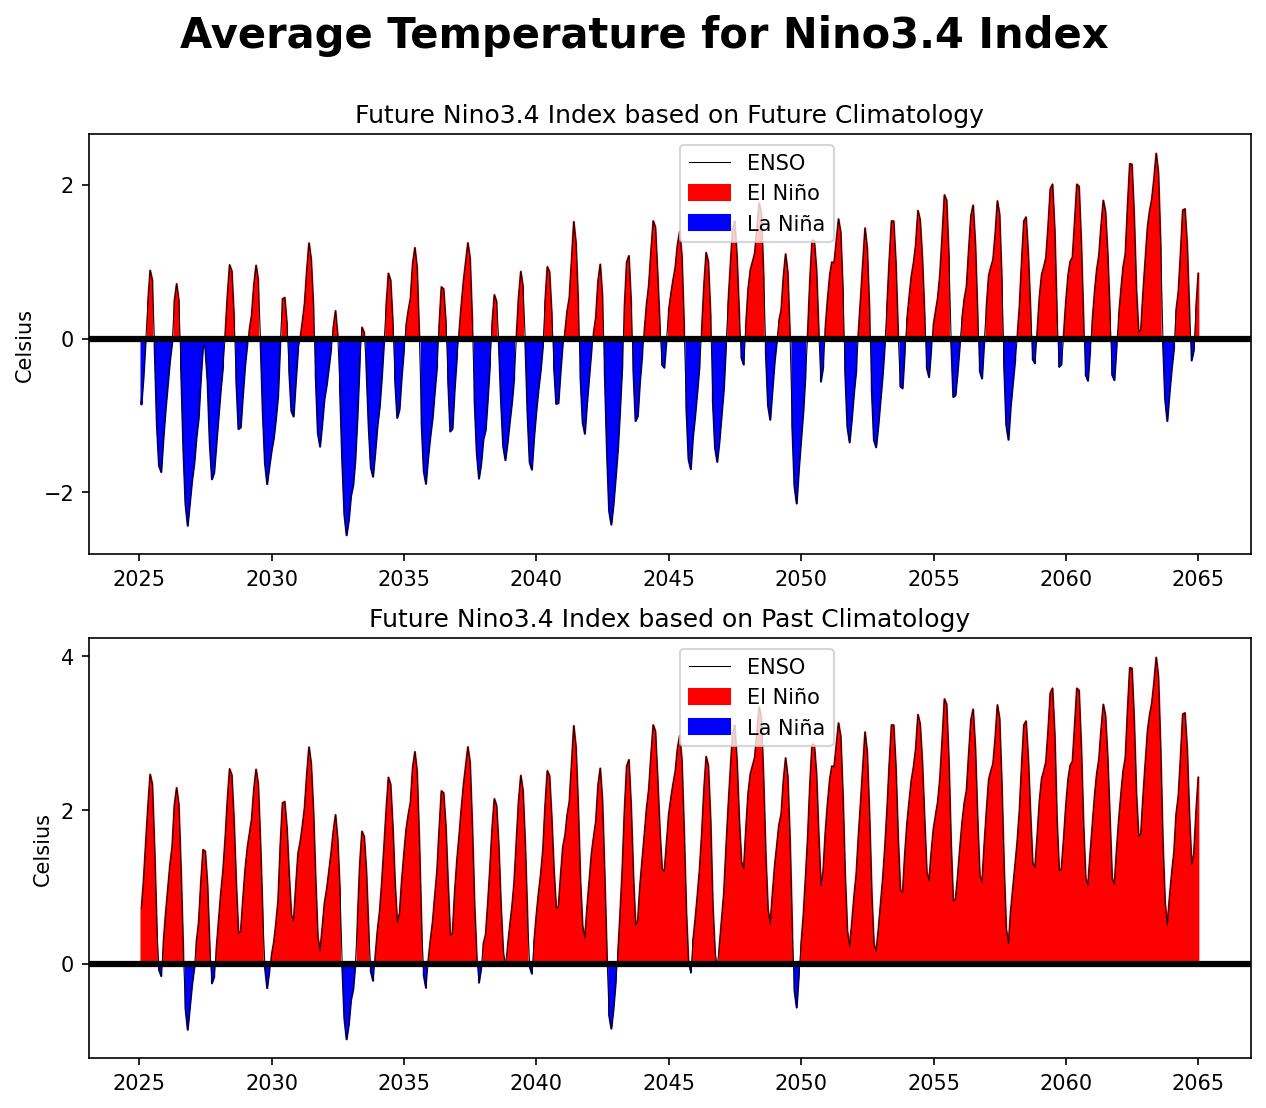

In [ ]:
fig, axs = plt.subplot_mosaic([['a)']],figsize=(10. , 8.),facecolor='white')
plt.suptitle('Average Temperature for Nino3.4 Index ',fontweight="bold",fontsize=20)
ax1= plt.subplot(211)
plt.axhline(y=0, color='k', linewidth=3, linestyle='-')
mean_anomaly_future = Temp_All_Ensembles_Nino34_future_ANOM.mean(["Ensemble", "lat", "lon"], skipna=True)
plt.plot(Temp_All_Ensembles_Nino34_future_ANOM.time, mean_anomaly_future, color='k', linewidth=0.5, label='ENSO')
pos_anomaly_future = mean_anomaly_future > 0
plt.fill_between(Temp_All_Ensembles_Nino34_future_ANOM["time"], mean_anomaly_future, where=pos_anomaly_future, color='red', label='El Niño')
neg_anomaly_future = mean_anomaly_future < 0
plt.fill_between(Temp_All_Ensembles_Nino34_future_ANOM["time"], mean_anomaly_future, where=neg_anomaly_future, color='blue', label='La Niña')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
plt.ylabel("Celsius")
plt.title("Future Nino3.4 Index based on Future Climatology")

ax2= plt.subplot(212)
plt.axhline(y=0, color='k', linewidth=3, linestyle='-')
mean_anomaly_future_from_past = Temp_All_Ensembles_Nino34_future_ANOM_from_past.mean(["Ensemble", "lat", "lon"], skipna=True)
plt.plot(Temp_All_Ensembles_Nino34_future_ANOM_from_past.time, mean_anomaly_future_from_past, color='k', linewidth=0.5, label='ENSO')
pos_anomaly_future_from_past = mean_anomaly_future_from_past > 0
plt.fill_between(Temp_All_Ensembles_Nino34_future_ANOM_from_past["time"], mean_anomaly_future_from_past, where=pos_anomaly_future_from_past, color='red', label='El Niño')
neg_anomaly_future_from_past = mean_anomaly_future_from_past < 0
plt.fill_between(Temp_All_Ensembles_Nino34_future_ANOM_from_past["time"], mean_anomaly_future_from_past, where=neg_anomaly_future_from_past, color='blue', label='La Niña')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
plt.ylabel("Celsius")
plt.title("Future Nino3.4 Index based on Past Climatology")

plt.rcParams.update({'font.size': 20})

10) Based on predictive data, what are some socio-economic aspects of the Oceanic regions that could be worsened by climate change?



*   https://www.worldbank.org/en/topic/social-dimensions-of-climate-change
*   https://www.imperial.ac.uk/grantham/publications/climate-change-faqs/what-are-the-impacts-of-climate-change/
*   https://www.cgdev.org/sites/default/files/socioeconomic-impact-climate-change-developing-countries-next-decades.pdf
*   https://research.fit.edu/media/site-specific/researchfitedu/coast-climate-adaptation-library/pacific-islands/micronesia/IFAD.--CC-Impacts.pdf
*   https://caribbean.un.org/en/173533-small-islands-are-increasingly-affected-climate-change-ipcc-report


